
# EDA on English Premier League Data
___

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Premier_League_Logo.svg/1200px-Premier_League_Logo.svg.png" align='center'><br/>

**English Premier League** or the EPL, is the top level of the English football league system where clubs compete to win the prestigious title. It operates on a system of promotion and relegation with the English Football League (EFL) with seasons run from August to May.
The competition was founded as the FA Premier League on 20 February 1992. The league is a corporation in which the member clubs act as shareholders, and generates €2.2 billion per year in domestic and international television rights. The Premier League is the most-watched sports league in the world, broadcast in 212 territories to 643 million homes and a potential TV audience of 4.7 billion people.

###### Table of Contents

1. [Problem Statement](#section1)<br>
2. [Import Packages and Setup](#section2)<br>
3. [Loading Data](#section3)<br>
4. [Data Profiling](#section4)<br>
    4.1 [Understanding the Dataset](#section401)<br/>
    4.2 [Pre Profiling](#section402)<br/>
    4.3 [Preprocessing](#section403)<br/>
    4.4 [Post Profiling](#section404)<br/>
5. [Exploratory Data Analysis](#section5)<br>
  * [**Analysis over a year**](#section501)<br>
     5.1.1 [Total matches played across different months](#section50101)<br>
     5.1.2 [Total goals scored across different months](#section50102)<br>
     5.1.3 [Average goals scored per match across different months](#section50103)<br>
     5.1.4 [Season wise average goals per match across different months](#section50104)<br>
  * [**Analysis based on teams**](#section502)<br>
     5.2.1 [Number of teams competing in each season](#section50201)<br>
     5.2.2 [Teams which have played most number of matches and least number of matches](#section50202)<br>
     5.2.3 [Teams which have scored the most and least number of goals](#section50203)<br>
     5.2.4 [Teams which have conceded the most number of goals](#section50204)<br>
     5.2.5 [Teams ranking based on number of wins-losses-draw rates at home games](#section50205)<br>
     5.2.6 [Teams ranking based on number of wins-losses-draw rates at away games](#section50206)<br>
     5.2.7 [Teams ranking based on number of wins-losses-draw rates overall](#section50207)<br>
     5.2.8 [Teams performance analysis per season](#section50208)<br>
       - [Teams which have won the league](#sectionTeamLeagueWin)<br>
       - [Teams which have finished top 6 in league](#sectionTeamLeagueTop6)<br>
       - [Teams which have finished at bottom in league](#sectionTeamBottomFinish)<br>
       
     5.2.9 [Scores of Top 6 consistent teams across all seasons](#section50209)<br>
  * [**Analysis based on full time and half time goals**](#section503)<br> 
     5.3.1 [Most common scoreline](#section50301)<br>
     5.3.2 [Teams which have successfully retained Half time lead at home games](#section50302)<br>
     5.3.3 [Teams which have successfully retained Half time lead at away games](#section50303)<br>
     5.3.4 [Teams which have lost home matches after leading in Half time](#section50304)<br>
     5.3.5 [Teams which have lost away matches after leading in Half time](#section50305)<br>
         
6. [Conclusion](#section6)<br>
     6.1 [Actionable Insights](#section601)<br>

<a id=section1></a>
## 1. Problem Statement
___

To explore the **English Premier League** data, so as to understand how it has fared across different seasons and evolved over the years. Analysis can help to determine **trends in league over a season** from August to May.

#### To perform analysis on:
  * Performance of teams over the years
  * Goal scoring behavior of teams
  * League progress over a season

#### To determine:
  * How to sustain in the league?
  * How to win the league?
  * What are the shortcomings in the league? And suggest suitable changes to improve the league conditions.  

<a id=section2></a>
## 2. Import Packages and Setup
___

In [1]:
# Data Analysis Packages
import numpy as np
import pandas as pd
import pandas_profiling

# Visualization Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Miscellaneous
import warnings

In [2]:
pd.set_option('mode.chained_assignment', None)        # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 12                   # To display every column of the dataset in head()

plt.style.use('seaborn-whitegrid')                    # Using seaborn white grid style for charts

warnings.filterwarnings('ignore')                     # To suppress all the warnings in the notebook

<a id=section3></a>
## 3. Loading Data
___

The data can be downloaded from https://github.com/insaid2018/Term-1/blob/master/Data/Projects/English_Premier_League.csv 

In [4]:
epl_dataset = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv")

### Description of the Dataset

- This dataset contains results from every Premier League match from 1993-1994 to 2017-2018. Columns include Division (denoted as E0), HomeTeam, AwayTeam, FTHG (final time home goals), FTAG (final time away goals), FTR (full time result), HTHG (half time home goals), HTAG (half time away goals), HTR (half time result), and season.


| Column Name        | Description                                                                                            |
| :----------------- | :----------------------------------------------------------------------------------------------------- |
| Div                | The division the match was played in.                                                                  | 
| Date               | The date the match was played.                                                                         | 
| HomeTeam           | The name of the home team.                                                                             | 
| AwayTeam           | The name of the away team.                                                                             |
| FTHG               | The total number of goals scored by the home team during the match at full time.                       |
| FTAG               | The total number of goals scored by the away team during the match at full time.                       |
| FTR                | The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).                  |
| HTHG               | The total number of goals scored by the home team at half time.                                        |
| HTAG               | The total number of goals scored by the away team at half time.                                        |
| HTR                | The half time result ('H' for home team advantage, 'A' for away team advantage, or 'D' for draw).      |
| Season             | The season in which the match was played.                                                              |

<a id=section4></a>
## 4. Data profiling
___

- Understanding the dataset.
- Pre profiling using __pandas profiling__ to identity columns in dataset that need preprocessing.
- Cleaning of dataset. 
- Perform post profiling to validate the preprocessing results.

<a id=section401></a>
### 4.1 Understanding the Dataset

Performing analysis to determine:
- The number of entries in dataset. 
- Data type of columns.
- Missing/invalid entries in columns.
- Central tendency of numerical columns.
- Characteristics of categorical columns.

In [489]:
epl_dataset.shape                                # Checking number of entries and columns in dataset

(9664, 11)

In [490]:
epl_dataset.columns                              # Listing the column names

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

In [491]:
epl_dataset.head()                               # Viewing the data pattern of top 5 rows

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [492]:
epl_dataset.info()                                # Determining data types of columns and non null entries for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [493]:
epl_dataset.describe(include='all')                # Checking the characteristics of column data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
count,9664,9664,9664,9664,9664.000000,9664.000000,9664,8740.000000,8740.000000,8740,9664
unique,1,2572,50,50,NaN,NaN,3,NaN,NaN,3,25
top,E0,26/12/94,Arsenal,Arsenal,NaN,NaN,H,NaN,NaN,D,1994-95
freq,9664,11,479,479,NaN,NaN,4461,NaN,NaN,3679,462
mean,NaN,NaN,NaN,NaN,1.523903,1.121482,NaN,0.685469,0.488444,NaN,NaN
std,NaN,NaN,NaN,NaN,1.301671,1.121667,NaN,0.833581,0.710524,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,NaN


In [494]:
# Determining the number of null values and their percentages for each column
epl_null = pd.DataFrame({'Number' : epl_dataset.isnull().sum(), 
                         'Percentage %' : epl_dataset.isnull().sum()/epl_dataset.shape[0]*100},
                       index = epl_dataset.columns)
print(epl_null)

          Number  Percentage %
Div            0      0.000000
Date           0      0.000000
HomeTeam       0      0.000000
AwayTeam       0      0.000000
FTHG           0      0.000000
FTAG           0      0.000000
FTR            0      0.000000
HTHG         924      9.561258
HTAG         924      9.561258
HTR          924      9.561258
Season         0      0.000000


**Observations:**
1. The English Premier League data has **9664 match entries** and **11 columns**.
2. 4 numerical columns and 7 categorical columns.
3. **FTHG, FTAG, HTAG and HTHG are right skewed** has high number of goals in some matches is pulling the mean towards right.
4. Each of **HTHG, HTAG, HTR columns have 924 null entries** accounting to 9.56% of total entries being empty.

<a id=section402></a>
### 4.2 Pre Profiling

Generating profile report to obtain more detailed analysis on data of each column.

In [11]:
pre_profile = pandas_profiling.ProfileReport(epl_dataset)              # Generating profile report using pandas_profiling

In [12]:
pre_profile.to_file("epl_before_preprocessing.html")                   # Saving profile report to local html file

**Observations from profile report:**
1. **Div column has constant value** and can be ignored.
2. Date field is represented as string value. **Different representation of date is used** with characters varying from 8 to 10.
3. **50 teams** have participated in EPL over 25 seasons.
4. **Home teams are more likely to score** than away teams.
  * Number of zero goals in FTHG (2261) < Number of zero goals in FTAG (3359).
  * Total goals scored by home team (14727) > Total goals scored by away team (10838).
5. **Home teams are more likely to win**:
  * Home - 4461	(46.2%)
  * Away - 2657	(27.5%)
  * Draw - 2546	(26.3%)
6. **924 missing values** in each of HTHG, HTAG, HTR columns.
7. Both home and away **teams are more likely to score in second half**:
  * Number of zero goals in FTHG (2261) < Number of zero goals in HTHG (4428).
  * Number of zero goals in FTAG (3359) < Number of zero goals in HTAG (5405).
  * Median of HTHG and HTAG is 0.
8. Higher chances that **neither of the teams have advantage in half team**:
  * Draw - 3679	(38.1%)
  * Home - 3086	(31.9%)
  * Away - 1975	(20.4%)
9. Season varies from 1993-94 to 2017-18. **More matches played in seasons 1993-94 and 1994-95 (462) than rest of the seasons (380)**.
  

<a id=section403></a>
### 4.3 Preprocessing
Preprocessing the data based on observation from profile report

> Removing __Div__ field has it has constant value. Only tier 1 matches from EPL are available in dataset, hence all values are constant.

In [5]:
epl_dataset.drop(columns='Div', inplace=True)

> Converting **Date field to pandas Datetime field**

In [5]:
epl_dataset['Date'].str.len().unique()                             # Date formats varying from 8 characters to 10 characters

array([ 8,  9, 10], dtype=int64)

In [6]:
epl_dataset[epl_dataset['Date'].str.len() == 8]['Date'].head(2)    # Date representation in 8 characters has format dd/mm/yy

0    14/08/93
1    14/08/93
Name: Date, dtype: object

In [7]:
epl_dataset[epl_dataset['Date'].str.len() == 9]['Date'].head(2)    # Date representation in 8 characters has format dd/m/yyyy

66    11/9/1993
67    11/9/1993
Name: Date, dtype: object

In [8]:
epl_dataset[epl_dataset['Date'].str.len() == 10]['Date'].head(2)   # Date representation in 8 characters has format dd/m/yyyy

205    11/12/1993
206    11/12/1993
Name: Date, dtype: object

In [6]:
# Converting Date field to datetime type for further analysis based on the field
epl_dataset['Date'] = pd.to_datetime(epl_dataset['Date'], dayfirst=True)

> Analysing the list of teams

In [95]:
epl_dataset['HomeTeam'].unique()

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Liverpool', 'Man City',
       'Newcastle', 'Oldham', 'Sheffield United', 'Southampton',
       'West Ham', 'Norwich', 'Tottenham', 'Everton', 'Ipswich', 'Leeds',
       'Wimbledon', 'Blackburn', 'Coventry', 'Man United', 'QPR',
       'Sheffield Weds', 'Swindon', 'Crystal Palace', 'Leicester',
       "Nott'm Forest", 'Bolton', 'Middlesbrough', 'Derby', 'Sunderland',
       'Barnsley', 'Charlton', 'Watford', 'Bradford', 'Fulham',
       'Birmingham', 'Middlesboro', 'West Brom', 'Portsmouth', 'Wolves',
       'Wigan', 'Reading', 'Hull', 'Stoke', 'Burnley', 'Blackpool',
       'Swansea', 'Cardiff', 'Bournemouth', 'Brighton', 'Huddersfield'],
      dtype=object)

**It can be seen that team Middlesbrough is represented in 2 formats: Middlesbrough and Middlesboro**. 
Changing values in HomeTeam and AwayTeam to reflect single representation of team.

In [7]:
epl_dataset.loc[epl_dataset['HomeTeam'] == 'Middlesboro', 'HomeTeam'] = 'Middlesbrough'
epl_dataset.loc[epl_dataset['AwayTeam'] == 'Middlesboro', 'AwayTeam'] = 'Middlesbrough'

> Addressing missing values in HTHG, HTAG, HTR fields. 

In [10]:
epl_dataset[epl_dataset['HTAG'].isnull() | epl_dataset['HTHG'].isnull()]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,1993-08-14,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,1993-08-14,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,1993-08-14,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,1993-08-14,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,1993-08-14,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...
919,1995-05-14,Norwich,Aston Villa,1,1,D,NaN,NaN,NaN,1994-95
920,1995-05-14,Sheffield Weds,Ipswich,4,1,H,NaN,NaN,NaN,1994-95
921,1995-05-14,Southampton,Leicester,2,2,D,NaN,NaN,NaN,1994-95
922,1995-05-14,Tottenham,Leeds,1,1,D,NaN,NaN,NaN,1994-95


In [11]:
epl_dataset[epl_dataset['HTAG'].isnull() | epl_dataset['HTHG'].isnull()]['Season'].unique()

array(['1993-94', '1994-95'], dtype=object)

Half time goals and results are not available for only 2 seasons: **1993-94** and **1994-95**

In [12]:
# Since the half time score of either of the teams should be 0, if their full time score is 0, substituting 
# HTHG = 0 if FTHG = 0
# HTAG = 0 if FTAG = 0
epl_dataset.loc[epl_dataset['HTHG'].isnull() & (epl_dataset['FTHG'] == 0), 'HTHG'] = 0
epl_dataset.loc[epl_dataset['HTAG'].isnull() & (epl_dataset['FTAG'] == 0), 'HTAG'] = 0

In [22]:
epl_dataset.loc[epl_dataset['HTAG'].isnull() | epl_dataset['HTHG'].isnull()].shape

(830, 10)

Substituting rest of the null values of HTHG and HTAG with their medians (i.e. zero).
And HTR with mode (i.e. 'D')

In [8]:
epl_dataset.loc[epl_dataset['HTAG'].isnull(), 'HTAG'] = 0
epl_dataset.loc[epl_dataset['HTHG'].isnull(), 'HTHG'] = 0
epl_dataset.loc[epl_dataset['HTR'].isnull(), 'HTR'] = 'D'

# Type casting HTAG and HTHG fields to int64
epl_dataset['HTAG'] = epl_dataset['HTAG'].astype('int64')
epl_dataset['HTHG'] = epl_dataset['HTHG'].astype('int64')

<a id=section403Note></a>
As seen above even after substituting HTHG = 0 when FTHG = 0 and HTAG = 0 when FTAG = 0, there are **830 entries for which result cannot be determined**. This accounts to 830/9664 * 100 = **8.6% of total values**. On substituting zero for HTHG and HTAG for rest of the values, big bias is introduced to the respective columns (as 8.6% is a big value).

## Note:
Due to aforementioned bias being introduced, when columns HTAG, HTHG and HTR are being analyzed, the data will not be considered for seasons **1993-94 and 1994-95** as replacement of values were done only for these 2 seasons.

<a id=section404></a>
### 4.4 Post Profiling

In [24]:
post_profile = pandas_profiling.ProfileReport(epl_dataset)          # Generating profile report after preprocessing of columns

In [25]:
post_profile.to_file("epl_after_preprocessing.html")

**Observations from profile report:**
1. Date field is converted to datetime type.
2. No null values in data frame.
3. From correlation section it found that: 
  * FTHG and HTHG are positively correlated. 
  * FTAG and HTAG are positively correlated.
4. The density distribution of half time and full time scores can be found in Interactions section of report. Further analysis on this is done in EDA section.

<a id=section5></a>
## 5. Exploratory Data Analysis
___

<a id=section501></a>
### 5.1 Analysis over a year

<a id=section50101></a>
#### 5.1.1 Total matches played across different months

Text(0.5, 1.0, 'Total matches played per month over 15 seasons')

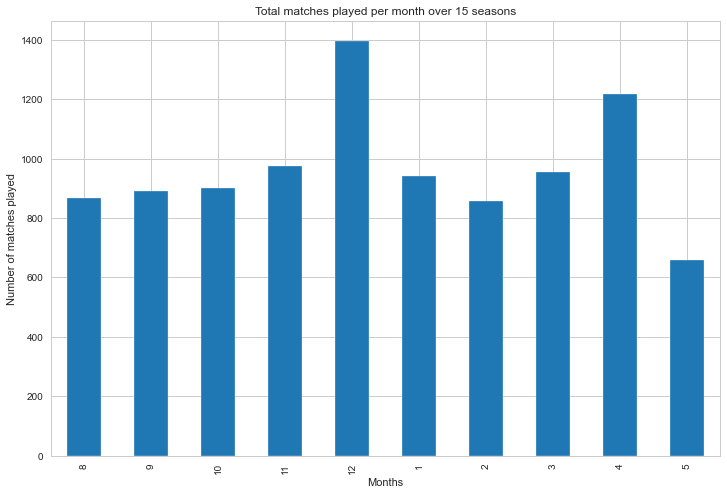

In [70]:
matches_per_month = epl_dataset.groupby(epl_dataset['Date'].dt.month)['Date'].count().iloc[epl_dataset['Date'].dt.month.unique().argsort()]
matches_per_month.plot.bar(figsize=(12,8))
plt.xlabel("Months")
plt.ylabel("Number of matches played")
plt.title("Total matches played per month over 15 seasons")

<a id=section50101obs></a>
#### The plot shows the number of matches played over a season year (i.e. August to May).
- More matches are played in the months of **December** and **April**.
- This can be due to holidays season in Europe, **Christmas in December** and **Easter in April** wherein more audience is available to watch the matches.
- **Across other months the number of matches played are comparable** to each other.
- Since the league ends in 2nd or 3rd week of **May, lesser matches are scheduled in the month**.

<a id=section50102></a>
#### 5.1.2 Total goals scored across different months

In [67]:
goals_per_month = epl_dataset.groupby(epl_dataset['Date'].dt.month)['FTHG','FTAG'].sum().iloc[epl_dataset['Date'].dt.month.unique().argsort()]
# Creating total goals column
goals_per_month['Total Goals'] = goals_per_month['FTHG'] + goals_per_month['FTAG'] 
# Renaming home and away goals column for better readability
goals_per_month.rename(columns={"FTHG" : "Home Goals", "FTAG" : "Away Goals"}, inplace=True)

Text(0.5, 1.0, 'Total goals scored per month over 15 seasons')

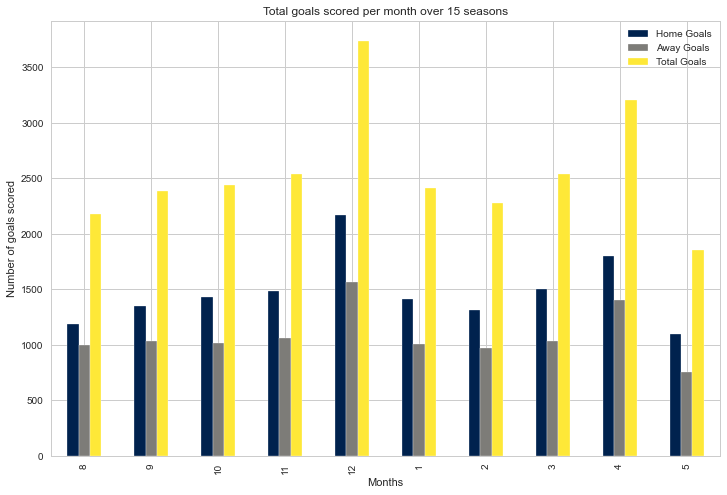

In [68]:
goals_per_month.plot.bar(y=["Home Goals", "Away Goals", "Total Goals"], figsize=(12,8), cmap="cividis")
plt.xlabel("Months")
plt.ylabel("Number of goals scored")
plt.title("Total goals scored per month over 15 seasons")

As the number of matches played in **December** and **April** are higher than rest of the months, the number of goals scored in these months are also higher.

<a id=section50103></a>
#### 5.1.3 Average goals scored per match across different months

Since the number of matches conducted per month vary, let us examine if goals scored per match also vary across different months

In [71]:
goals_per_match = pd.DataFrame()
goals_per_match['Home Goals'] = goals_per_month['Home Goals']/matches_per_month
goals_per_match['Away Goals'] = goals_per_month['Away Goals']/matches_per_month
goals_per_match['Total Goals'] = goals_per_month['Total Goals']/matches_per_month

In [27]:
goals_per_match

,Home Goals,Away Goals,Total Goals
Date,,,
8,1.369816,1.144009,2.513825
9,1.516274,1.163861,2.680135
10,1.582686,1.127636,2.710322
11,1.525667,1.084189,2.609856
12,1.552688,1.124014,2.676703
1,1.494168,1.064687,2.558855
2,1.526254,1.127188,2.653442
3,1.571130,1.083682,2.654812
4,1.474159,1.153404,2.627564


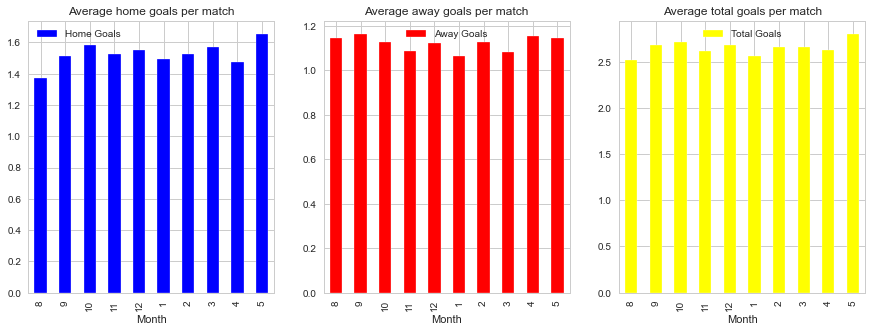

In [72]:
f,ax = plt.subplots(1, 3)
goals_per_match.plot.bar(y="Home Goals", figsize=(12,8), ax=ax[0], color="blue")
goals_per_match.plot.bar(y="Away Goals", figsize=(12,8), ax=ax[1], color="red")
goals_per_match.plot.bar(y="Total Goals", figsize=(12,8), ax=ax[2], color="yellow")
ax[0].set_title('Average home goals per match')
ax[0].set_xlabel('Month')
ax[1].set_title('Average away goals per match')
ax[1].set_xlabel('Month')
ax[2].set_title('Average total goals per match')
ax[2].set_xlabel('Month')
f.set_figheight(5)
f.set_figwidth(15)

In [29]:
print('\b Standard deviations of goals across months:')
print('Home goals per match: ', goals_per_match['Home Goals'].std())
print('Away goals per match: ', goals_per_match['Away Goals'].std())
print('Total goals pers match: ', goals_per_match['Total Goals'].std())

 Standard deviations of goals across months:
Home goals per match:  0.07532092422283149
Away goals per match:  0.03336362001659973
Total goals pers match:  0.0797223666621781


- There is very **minimal change in away goals scored per match over different months**.
- The change in average total goals per match is mainly due to difference in comparatively **higher variations in average home goals scored per match over different months**.
- There is **drops is home goals scored in November and December**, possibly due to resting of main players for peak Christmas season.
- **Drops in home goals scored in January and April** can be accounted due to exhaustion of players due to high number of matches played in festive time.
- **May has high average home goals per match** due to more [relaxed schedule](#section50101obs) of matches towards the end of season. 

<a id=section50104></a>
#### 5.1.4 Season wise average goals per match across different months

Having seen the variantion in average goals per match across different months, let us investigate if similar difference is reflected across different seasons. 

In [12]:
goals_per_season_month = epl_dataset.groupby(['Season', epl_dataset['Date'].dt.month])['FTHG', 'FTAG'].sum()
goals_per_season_month.reset_index(inplace=True)

months_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
goals_per_season_month['Month'] = goals_per_season_month['Date'].map(months_map)

goals_per_season_month['Total Goals'] = goals_per_season_month['FTHG'] + goals_per_season_month['FTAG']

Text(0.5, 1.0, 'Variation of goals scored per month across different seasons')

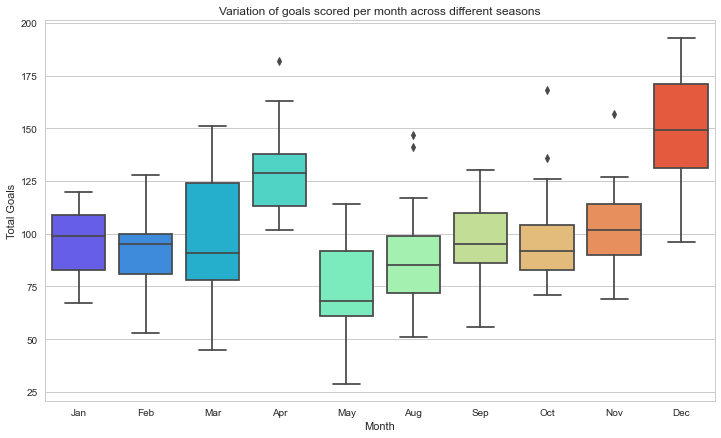

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(data=goals_per_season_month, x='Month', y='Total Goals', palette='rainbow')
plt.title("Variation of goals scored per month across different seasons")

**Observations:**
  * The **goals scored in April and December (festive time) is high across all seasons** due to more number of matches played in these months.
  * Few seasons recorded very high number of goals in August, October and November.
  * Again, **May records lowest goals scored across all seasons** due to lesser games played.

#### Using swarmplot for better understanding distribution of goals across seasons

Text(0.5, 1.0, 'Variation of goals scored per month across different seasons')

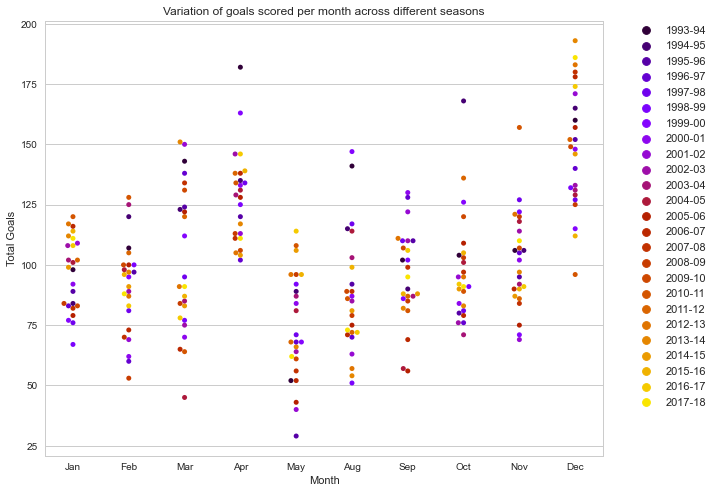

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(style='whitegrid', palette='bright')
sns.swarmplot(x="Month", y="Total Goals", hue="Season", palette="gnuplot", data=goals_per_season_month, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Variation of goals scored per month across different seasons")

<a id=sectionGPSM2></a>
**Observation:**
  * The **outliers shown in box plot correspond to seasons of 1990s** era.
  * **Goals per month is randomly distributed over seasons**, as number of matches played in a month also vary across seasons.
  * However, **2016-17 and 2017-18 seasons rank higher in goals scored** across various months.

#### Since number of matches vary across months in different seasons, goals per match will provide a better picture of goals count per season

In [14]:
matches_per_season_month = epl_dataset.groupby(['Season', epl_dataset['Date'].dt.month])['Date'].count()

In [15]:
matches_per_season_month = epl_dataset.groupby(['Season', epl_dataset['Date'].dt.month])['Date'].count()

avg_goals_per_match = goals_per_season_month.copy()
avg_goals_per_match['Home'] = goals_per_season_month['FTHG']/matches_per_season_month.values
avg_goals_per_match['Away'] = goals_per_season_month['FTAG']/matches_per_season_month.values
avg_goals_per_match['Total'] = goals_per_season_month['Total Goals']/matches_per_season_month.values

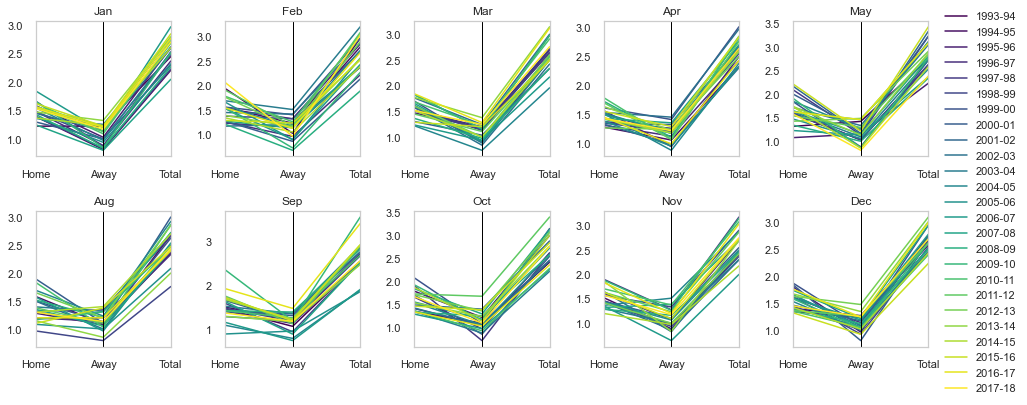

In [92]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
counter = 1
for i in avg_goals_per_match['Date'].unique():
    ax = fig.add_subplot(2, 5, counter)
    counter += 1
    parallel_coordinates(avg_goals_per_match[avg_goals_per_match['Date'] == i], class_column='Season', colormap='viridis',  
                     cols=['Home', 'Away', 'Total'], ax=ax)
    ax.set_title(months_map[i])
    plt.legend().remove()
    
plt.legend(bbox_to_anchor=(1.09, 2.5), loc=2, borderaxespad=0.)
plt.title("Average goals ")

<a id=sectionGPSM></a>
**Observations:**
  * Goals scored per month are spread out evenly for all seasons.
  * **In most recent seasons** (denoted in shades of yellow), **high number of goals are scored in the months after New Year**. This gradually decreases from April onwards. There is a **big dip in average goals per match in months of April and December compared to other seasons**.
  * **For seasons in 1990s decade** (denoted in shades of purple), **the average goals per match is low across all months**.
  * **For seasons in 2000s decade** (denoted in shades of green), **the average goals per match is consistently between average goals of 1990s and 2010s decade**.

<a id=section502></a>
### 5.2 Analysis based on teams

<a id=section50201></a>
#### 5.2.1 Number of teams competing in each season

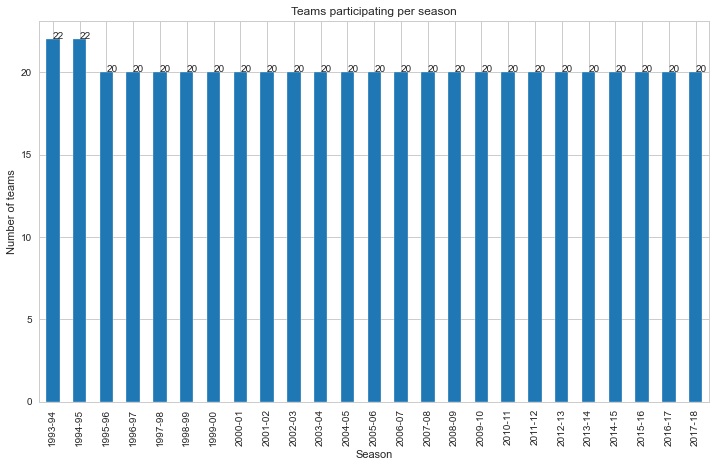

In [8]:
plt.figure(figsize=(12,7))
teams_per_season = epl_dataset.groupby('Season').aggregate({'HomeTeam' : 'unique'})['HomeTeam'].apply(lambda x: len(x))
ax = teams_per_season.plot.bar()
for idx, label in enumerate(list(teams_per_season.index)):
    ax.annotate(teams_per_season.loc[label], (idx, teams_per_season.loc[label]))
    ax.set_ylabel('Number of teams')
    ax.set_title("Teams participating per season")

In [152]:
epl_dataset.groupby('Season').aggregate({'Date' : 'count'})

,Date
Season,
1993-94,462
1994-95,462
1995-96,380
1996-97,380
1997-98,380
1998-99,380
1999-00,380
2000-01,380
2001-02,380


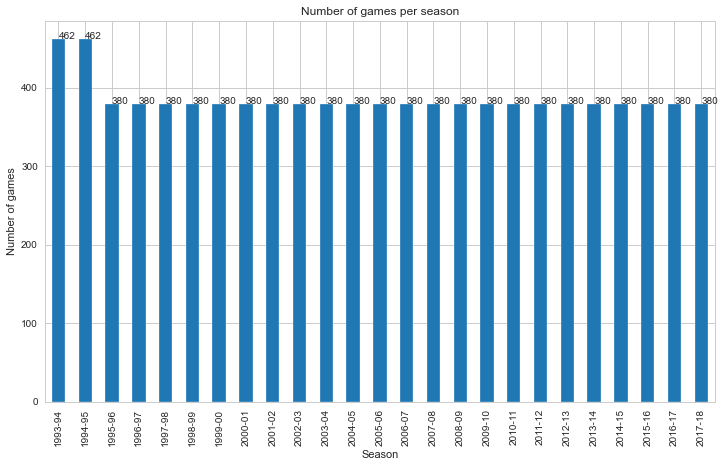

In [12]:
plt.figure(figsize=(12,7))
games_per_season = epl_dataset.groupby('Season').aggregate({'Date' : 'count'})['Date']
ax = games_per_season.plot.bar()
for idx, label in enumerate(list(teams_per_season.index)):
    ax.annotate(games_per_season.loc[label], (idx, games_per_season.loc[label]))
    ax.set_ylabel('Number of games')
    ax.set_title("Number of games per season")

<a id=sectionTeamMatchNum></a>
**Observation:**
  * Only seasons **1993-94 and 1994-95 had 22 teams** competiting in the league. **Rest of the seasons, had 20 teams** participating.
  * Subsequently, number of **matches played in 1993-94 and 1994-95 seasons are higher : 462** (21 x 22). While **rest of the seasons have 380 matches** (19 x 20).

<a id=section50202></a>
#### 5.2.2 Teams which have played most number of matches and least number of matches

In [17]:
home_games_count = epl_dataset.groupby('HomeTeam')['Date'].count()
home_games_count = home_games_count.reset_index()
away_games_count = epl_dataset.groupby('AwayTeam')['Date'].count()
away_games_count = away_games_count.reset_index()

In [18]:
team_games_played = pd.merge(home_games_count, away_games_count, left_on='HomeTeam', right_on='AwayTeam')
team_games_played.drop('AwayTeam', axis=1, inplace=True)
team_games_played.rename(columns={'HomeTeam' : 'TeamName', 'Date_x' : 'Home_Games', 'Date_y' : 'Away_Games'}, inplace=True)

team_games_played['Total_Games'] = team_games_played['Home_Games'] + team_games_played['Away_Games']

In [19]:
team_games_played.sort_values(by='Total_Games', ascending=False, inplace=True)
team_games_played['Seasons_Played'] = team_games_played['Total_Games']/38
team_games_played['Seasons_Played'] = team_games_played['Seasons_Played'].apply(lambda x: np.floor(x).astype(int))

In [20]:
team_games_played.set_index(keys='TeamName', inplace=True)

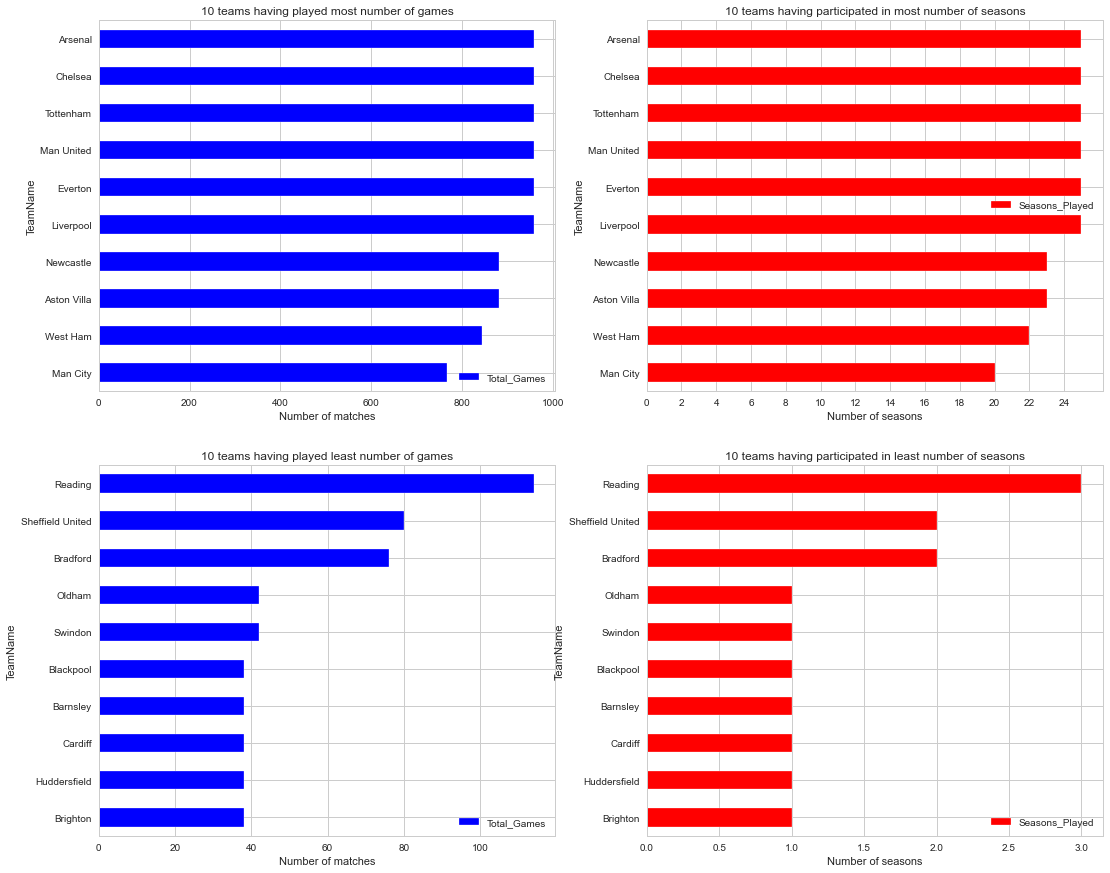

In [21]:
f,ax = plt.subplots(2, 2)
team_games_played[:10][::-1].plot.barh(y="Total_Games", figsize=(12,8), ax=ax[0,0], color="blue")
team_games_played[:10][::-1].plot.barh(y="Seasons_Played", figsize=(12,8), ax=ax[0,1], color="red")
team_games_played[-10:][::-1].plot.barh(y="Total_Games", figsize=(12,8), ax=ax[1,0], color="blue")
team_games_played[-10:][::-1].plot.barh(y="Seasons_Played", figsize=(12,8), ax=ax[1,1], color="red")
ax[0,0].set_title('10 teams having played most number of games')
ax[0,0].set_xlabel('Number of matches')
ax[0,1].set_title('10 teams having participated in most number of seasons')
ax[0,1].set_xlabel('Number of seasons')
ax[1,0].set_title('10 teams having played least number of games')
ax[1,0].set_xlabel('Number of matches')
ax[1,1].set_title('10 teams having participated in least number of seasons')
ax[1,1].set_xlabel('Number of seasons')
ax[0,1].set_xticks(np.arange(0,26,2))
f.set_figheight(15)
f.set_figwidth(18)

<a id=sectionSeasonsCount></a>
**Observations:**
  * Set of **6 teams have participated in all seasons** :  Arsenal, Chelsea, Tottenham, Man United, Liverpool and Everton
  * Set of **7 teams have participated only once in EPL** : Oldham, Swindon, Cardiff, Backpool, Huddersfield, Barnsley and Brighton

<a id=section50203></a>
#### 5.2.3 Teams which have scored most and least number of goals

In [14]:
team_home_goals = epl_dataset.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False)
team_home_goals = team_home_goals.reset_index()
team_home_goals.rename(columns={'FTHG' : 'Home_Goals', 'HomeTeam' : 'TeamName'}, inplace=True)
team_home_goals.set_index(keys='TeamName', inplace=True)

team_away_goals = epl_dataset.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False)
team_away_goals = team_away_goals.reset_index()
team_away_goals.rename(columns={'FTAG' : 'Away_Goals', 'AwayTeam' : 'TeamName'}, inplace=True)
team_away_goals.set_index(keys='TeamName', inplace=True)

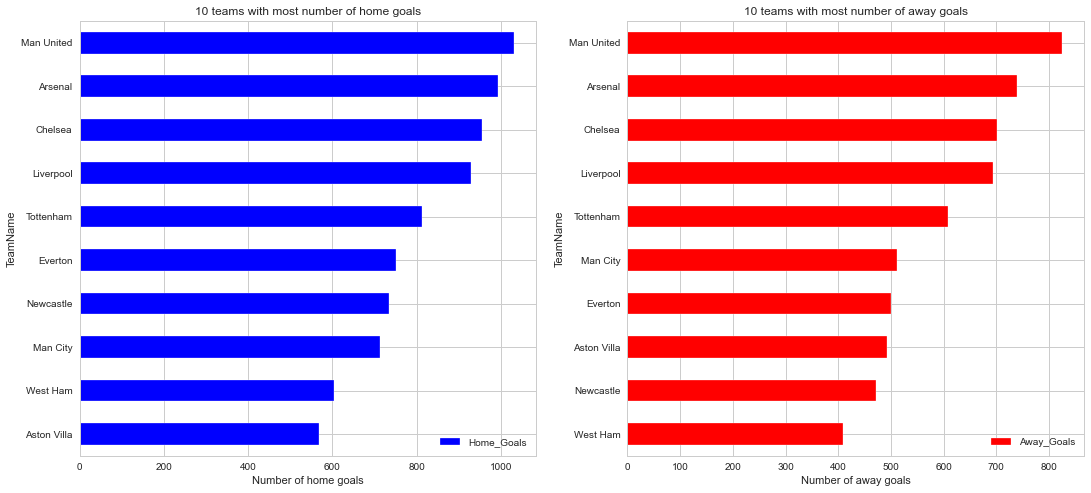

In [15]:
f,ax = plt.subplots(1, 2)
team_home_goals[:10][::-1].plot.barh(y="Home_Goals", figsize=(12,8), ax=ax[0], color="blue")
team_away_goals[:10][::-1].plot.barh(y="Away_Goals", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('10 teams with most number of home goals')
ax[0].set_xlabel('Number of home goals')
ax[1].set_title('10 teams with most number of away goals')
ax[1].set_xlabel('Number of away goals')
f.set_figheight(8)
f.set_figwidth(18)

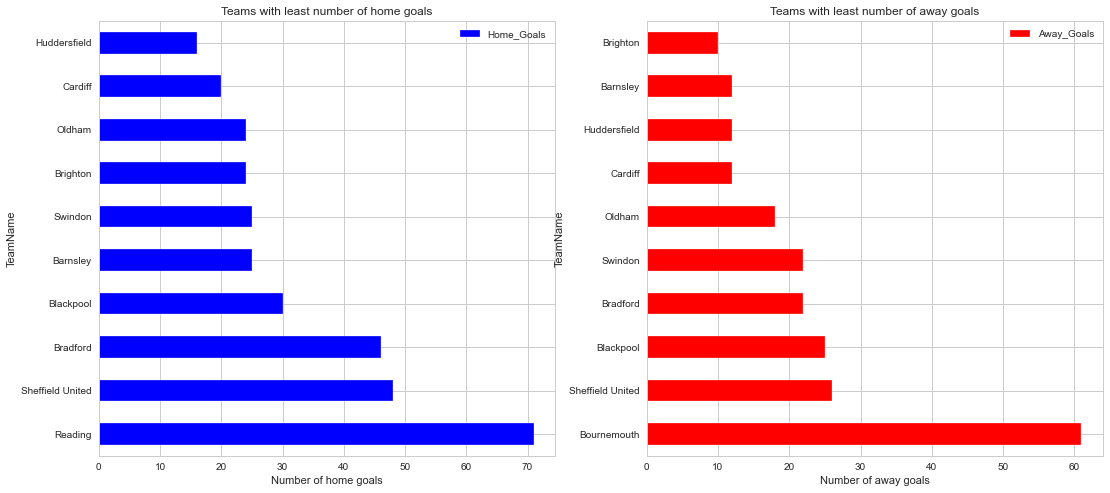

In [24]:
f,ax = plt.subplots(1, 2)
team_home_goals[-10:].plot.barh(y="Home_Goals", figsize=(12,8), ax=ax[0], color="blue")
team_away_goals[-10:].plot.barh(y="Away_Goals", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('Teams with least number of home goals')
ax[0].set_xlabel('Number of home goals')
ax[1].set_title('Teams with least number of away goals')
ax[1].set_xlabel('Number of away goals')
f.set_figheight(8)
f.set_figwidth(18)

**Observations:**
  * The teams which have played most number of games have scored most number of home and away goals. 

Hence, goals scored per match would be a better standard to evaluate performance of teams.

In [22]:
team_goals = pd.merge(team_home_goals, team_away_goals, on='TeamName')

team_goals_matches = pd.merge(team_goals, team_games_played, on='TeamName')

team_goals_matches['Total_Goals'] = team_goals_matches['Home_Goals'] + team_goals_matches['Away_Goals']

team_goals_matches['HG_per_match'] = team_goals_matches['Home_Goals']/team_goals_matches['Home_Games']
team_goals_matches['AG_per_match'] = team_goals_matches['Away_Goals']/team_goals_matches['Away_Games']
team_goals_matches['TG_per_match'] = team_goals_matches['Total_Goals']/team_goals_matches['Total_Games']

team_goals_matches.columns = team_goals_matches.columns.str.strip()

team_goals_matches.reset_index(inplace=True)

In [23]:
high_hg_per_match_teams = team_goals_matches.sort_values(by=['HG_per_match'], ascending=False)
high_ag_per_match_teams = team_goals_matches.sort_values(by=['AG_per_match'], ascending=False)
high_tg_per_match_teams = team_goals_matches.sort_values(by=['TG_per_match'], ascending=False)

high_hg_per_match_teams.set_index(keys='TeamName', inplace=True)
high_ag_per_match_teams.set_index(keys='TeamName', inplace=True)

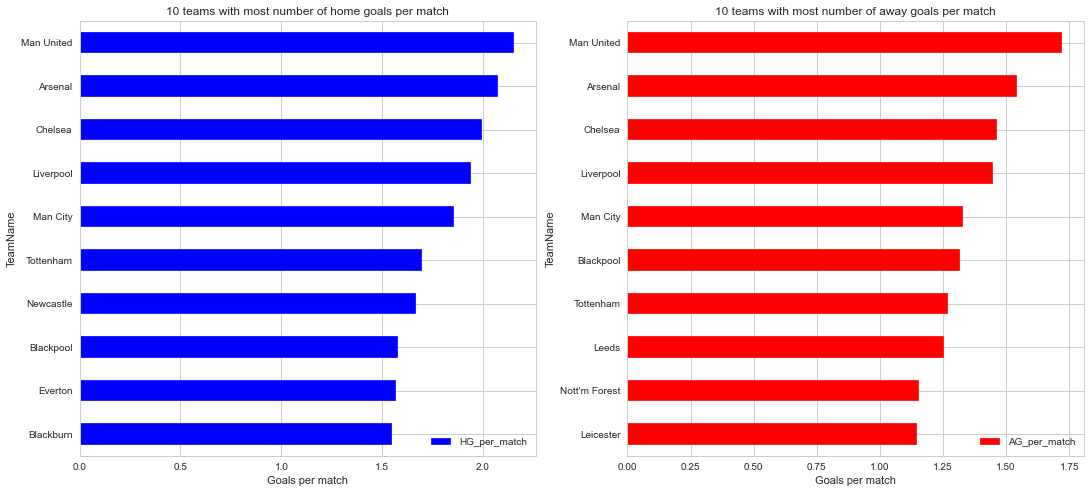

In [26]:
f,ax = plt.subplots(1, 2)
high_hg_per_match_teams[:10][::-1].plot.barh(y="HG_per_match", figsize=(12,8), ax=ax[0], color="blue")
high_ag_per_match_teams[:10][::-1].plot.barh(y="AG_per_match", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('10 teams with most number of home goals per match')
ax[0].set_xlabel('Goals per match')
ax[1].set_title('10 teams with most number of away goals per match')
ax[1].set_xlabel('Goals per match')
f.set_figheight(8)
f.set_figwidth(18)

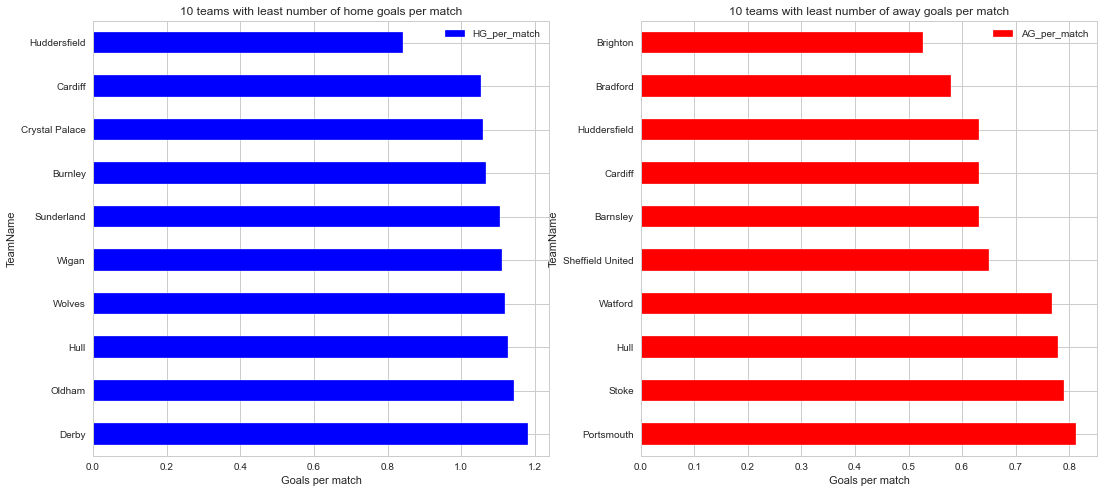

In [28]:
f,ax = plt.subplots(1, 2)
high_hg_per_match_teams[-10:].plot.barh(y="HG_per_match", figsize=(12,8), ax=ax[0], color="blue")
high_ag_per_match_teams[-10:].plot.barh(y="AG_per_match", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('10 teams with least number of home goals per match')
ax[0].set_xlabel('Goals per match')
ax[1].set_title('10 teams with least number of away goals per match')
ax[1].set_xlabel('Goals per match')
f.set_figheight(8)
f.set_figwidth(18)

**Observations:**

1. Home goals per game
  * **The top six teams which have featured in all seasons** of EPL (Man United, Arsenal, Chelsea, Liverpool, Tottenham, Everton), all **are among top 10 teams with highest home goals per game.**
  * **West Ham and Aston Villa** which are among teams with highest number of home goals, **do not have high home goals per game ratio**.
  * They are replaced by **Middlesboro and Blackpool.**
  
2. Away goals per game
  * **Everton** which has feature in all seasons **does not have high rate of goal scoring in away matches.**
  * **West Ham, Newcastle and Aston Villa** which are among teams with highest number of away goals, **do not have high away goals per game ratio**.
  * These teams are replaced by **Blackpool, Leeds, Nottingham Forest and Leicester City.**
  
**Blackpool which has played only 1 season, has high goal scoring per match average for both home and away games.**

Text(0, 0.5, 'Away goals per match')

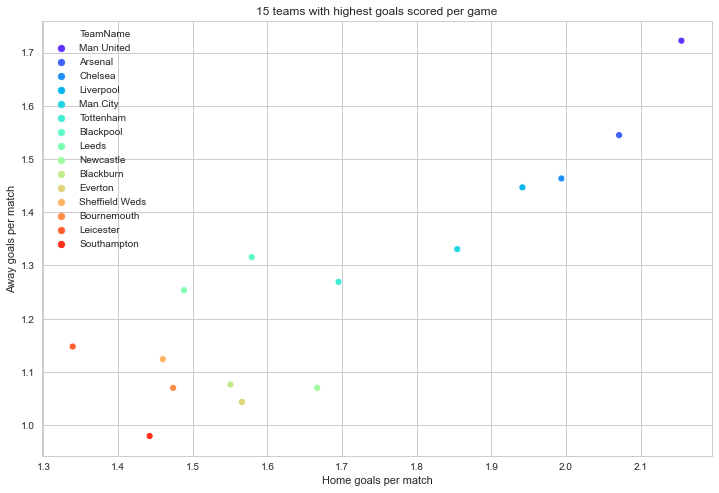

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=high_tg_per_match_teams[:15], x='HG_per_match', y='AG_per_match', hue='TeamName', palette="rainbow")
plt.title("15 teams with highest goals scored per game")
plt.xlabel("Home goals per match")
plt.ylabel("Away goals per match")

Text(0, 0.5, 'Away goals per match')

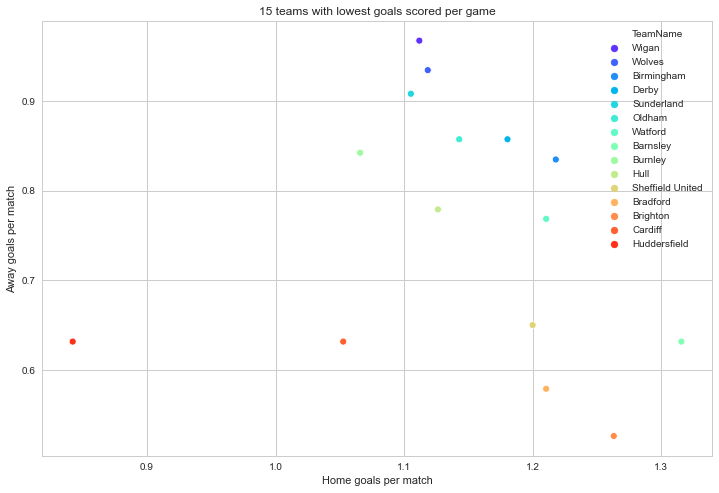

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=high_tg_per_match_teams[-15:], x='HG_per_match', y='AG_per_match', hue='TeamName', palette="rainbow")
plt.title("15 teams with lowest goals scored per game")
plt.xlabel("Home goals per match")
plt.ylabel("Away goals per match")

<a id=sectionHighGoalsRate></a>
**Observations:**
  * Generally, **the home goals per game is higher than away goals per game** for most of the teams.
  * The **top six teams which are among top scorers in EPL** (Man United, Arsenal, Chelsea, Liverpool, Man City, Tottenham), **have consistent high goals per game for both home and away matches.**
  * **Leicester city has high away goals per match ratio**, which is almost equal to their **home goals per match average.**
  * **Blackpool has surprisingly high home and away goals per game ratio** even though it has featured only 1 season in EPL. This could be due to their poor defence due to which they conceded more goals and were relegated.
  
#### To check this, let us examine the teams which have conceded most number of goals

<a id=section50204></a>
#### 5.2.4 Teams which have conceded most number of goals

In [32]:
team_home_goals_concede = epl_dataset.groupby('HomeTeam')['FTAG'].sum().sort_values(ascending=False)
team_home_goals_concede = team_home_goals_concede.reset_index()
team_home_goals_concede.rename(columns={'FTAG' : 'HG_concede', 'HomeTeam' : 'TeamName'}, inplace=True)
team_home_goals_concede.set_index(keys='TeamName', inplace=True)

team_away_goals_concede = epl_dataset.groupby('AwayTeam')['FTHG'].sum().sort_values(ascending=False)
team_away_goals_concede = team_away_goals_concede.reset_index()
team_away_goals_concede.rename(columns={'FTHG' : 'AG_concede', 'AwayTeam' : 'TeamName'}, inplace=True)
team_away_goals_concede.set_index(keys='TeamName', inplace=True)

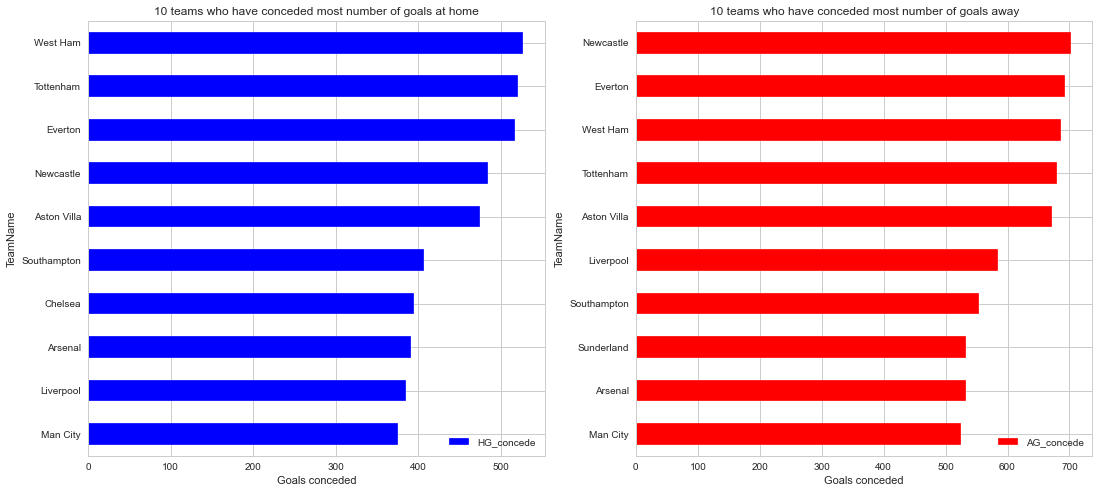

In [11]:
f,ax = plt.subplots(1, 2)
team_home_goals_concede[:10][::-1].plot.barh(y="HG_concede", figsize=(12,8), ax=ax[0], color="blue")
team_away_goals_concede[:10][::-1].plot.barh(y="AG_concede", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('10 teams who have conceded most number of goals at home')
ax[0].set_xlabel('Goals conceded')
ax[1].set_title('10 teams who have conceded most number of goals away')
ax[1].set_xlabel('Goals conceded')
f.set_figheight(8)
f.set_figwidth(18)

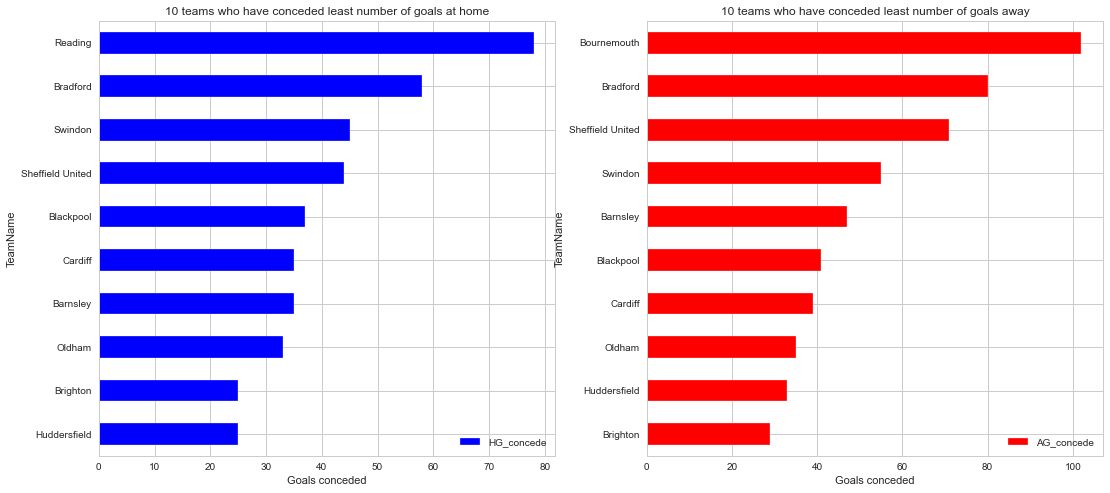

In [12]:
f,ax = plt.subplots(1, 2)
team_home_goals_concede[-10:][::-1].plot.barh(y="HG_concede", figsize=(12,8), ax=ax[0], color="blue")
team_away_goals_concede[-10:][::-1].plot.barh(y="AG_concede", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('10 teams who have conceded least number of goals at home')
ax[0].set_xlabel('Goals conceded')
ax[1].set_title('10 teams who have conceded least number of goals away')
ax[1].set_xlabel('Goals conceded')
f.set_figheight(8)
f.set_figwidth(18)

**Observation:**
  * **Man United which has played most number of matches does not feature in goals conceded list,** indicating they have good defence.
  * **Rest of the top 6 teams which have played most number of matches, have also conceded most number of goals.**

In [37]:
team_goals_concede = pd.merge(team_home_goals_concede, team_away_goals_concede, on='TeamName')

team_goals_concede_matches = pd.merge(team_goals_concede, team_games_played, on='TeamName')

team_goals_concede_matches['TG_concede'] = team_goals_concede_matches['HG_concede'] + team_goals_concede_matches['AG_concede']

team_goals_concede_matches['HG_concede_per_match'] = team_goals_concede_matches['HG_concede']/team_goals_concede_matches['Home_Games']
team_goals_concede_matches['AG_concede_per_match'] = team_goals_concede_matches['AG_concede']/team_goals_concede_matches['Away_Games']
team_goals_concede_matches['TG_concede_per_match'] = team_goals_concede_matches['TG_concede']/team_goals_concede_matches['Total_Games']

team_goals_concede_matches.columns = team_goals_concede_matches.columns.str.strip()

team_goals_concede_matches.reset_index(inplace=True)

In [38]:
high_hg_concede_per_match_teams = team_goals_concede_matches.sort_values(by=['HG_concede_per_match'], ascending=False)
high_ag_concede_per_match_teams = team_goals_concede_matches.sort_values(by=['AG_concede_per_match'], ascending=False)
high_tg_concede_per_match_teams = team_goals_concede_matches.sort_values(by=['TG_concede_per_match'], ascending=False)

high_hg_concede_per_match_teams.set_index(keys='TeamName', inplace=True)
high_ag_concede_per_match_teams.set_index(keys='TeamName', inplace=True)

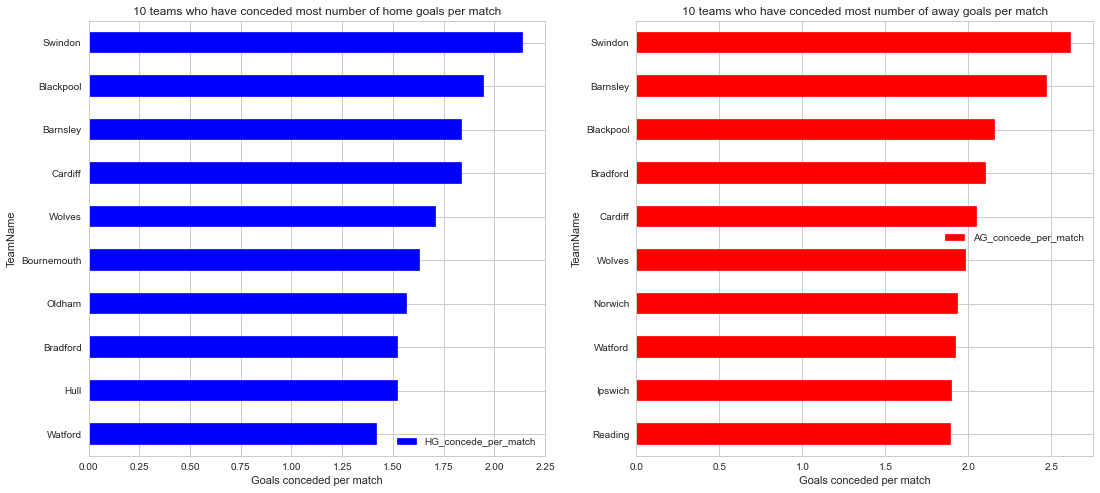

In [40]:
f,ax = plt.subplots(1, 2)
high_hg_concede_per_match_teams[:10][::-1].plot.barh(y="HG_concede_per_match", figsize=(12,8), ax=ax[0], color="blue")
high_ag_concede_per_match_teams[:10][::-1].plot.barh(y="AG_concede_per_match", figsize=(12,8), ax=ax[1], color="red")
ax[0].set_title('10 teams who have conceded most number of home goals per match')
ax[0].set_xlabel('Goals conceded per match')
ax[1].set_title('10 teams who have conceded most number of away goals per match')
ax[1].set_xlabel('Goals conceded per match')
f.set_figheight(8)
f.set_figwidth(18)

Text(0, 0.5, 'Goals conceded per away game')

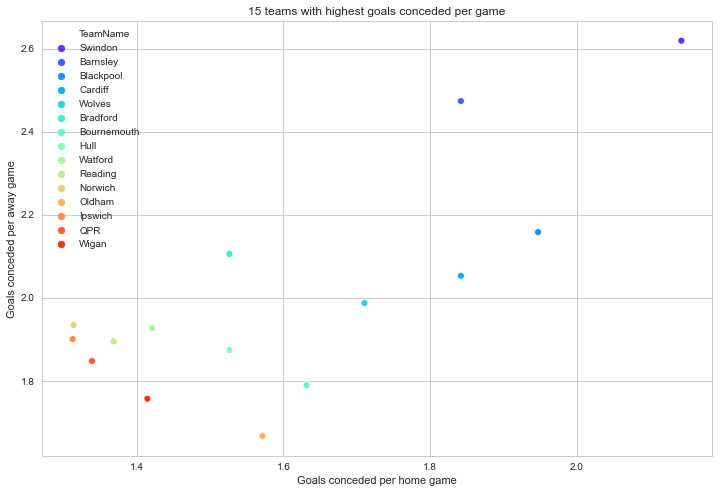

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=high_tg_concede_per_match_teams[:15], x='HG_concede_per_match', y='AG_concede_per_match', hue='TeamName', palette="rainbow")
plt.title('15 teams with highest goals conceded per game')
plt.xlabel('Goals conceded per home game')
plt.ylabel('Goals conceded per away game')

Text(0, 0.5, 'Goals conceded per away game')

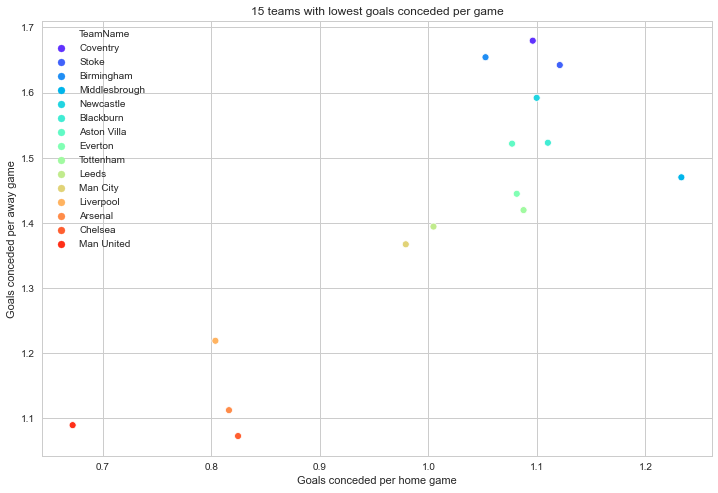

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=high_tg_concede_per_match_teams[-15:], x='HG_concede_per_match', y='AG_concede_per_match', hue='TeamName', palette="rainbow")
plt.title('15 teams with lowest goals conceded per game')
plt.xlabel('Goals conceded per home game')
plt.ylabel('Goals conceded per away game')

<a id=sectionTConcededMost></a>
**Observations:**
  * [Teams which have participated only once in EPL](#sectionSeasonsCount) **have conceded most number of goals per match both home and away.** Swindon, Barnsley, Backpool, Cardiff, Oldham have all been in EPL for only 1 season.
  * Blackpool which had high home and away goals per game, had been relegated due to its high conceding rate both at home and away. This resulted in it losing most of the games and being eliminated.

<a id=section50205></a>
#### 5.2.5 Teams ranking based on number of wins-losses-draw rates at home games

In [126]:
home_results = epl_dataset.groupby('HomeTeam')['FTR'].value_counts()

home_results = home_results.unstack()
home_results.rename(columns={'A' : 'Home_Losses', 'D' : 'Home_Draws', 'H' : 'Home_Wins'}, inplace=True)
home_results['Home_Matches'] = home_results['Home_Losses'] + home_results['Home_Draws'] + home_results['Home_Wins']
home_results['Home_Wins%'] = home_results['Home_Wins']/home_results['Home_Matches']
home_results['Home_Losses%'] = home_results['Home_Losses']/home_results['Home_Matches']
home_results['Home_Draws%'] = home_results['Home_Draws']/home_results['Home_Matches']

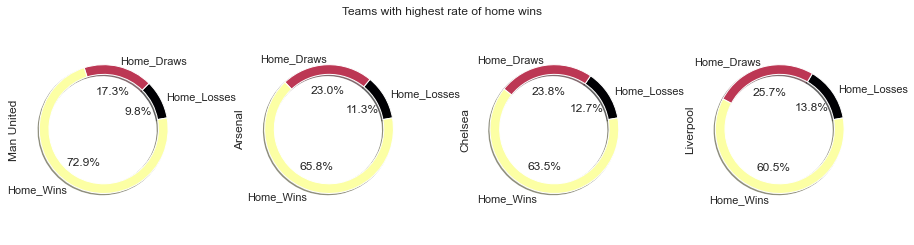

In [127]:
plot_top_teams_HW = home_results.sort_values(by='Home_Wins%', ascending=False)[:4].loc[:,'Home_Losses':'Home_Wins']

fig = plt.figure(figsize=(15,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of home wins")
for i in list(plot_top_teams_HW.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_HW.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=10, cmap='inferno', ax=ax)

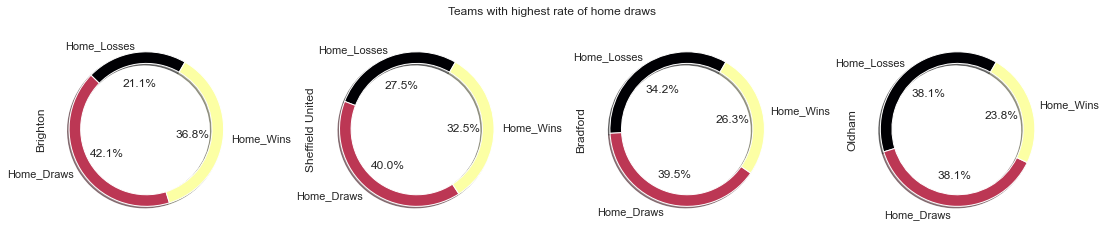

In [128]:
plot_top_teams_HD = home_results.sort_values(by='Home_Draws%', ascending=False)[:4].loc[:,'Home_Losses':'Home_Wins']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of home draws")
for i in list(plot_top_teams_HD.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_HD.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=60, cmap='inferno', ax=ax)

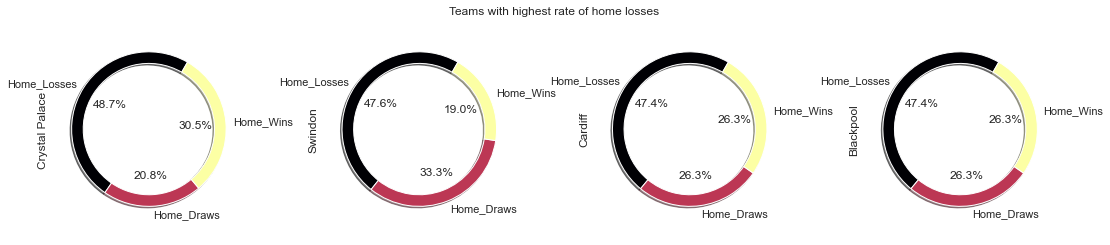

In [129]:
plot_top_teams_HL = home_results.sort_values(by='Home_Losses%', ascending=False)[:4].loc[:,'Home_Losses':'Home_Wins']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of home losses")
for i in list(plot_top_teams_HL.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_HL.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=60, cmap='inferno', ax=ax)

**Observation:**
  * Team which have played more number of games and have [high goal scoring rate](#sectionHighGoalsRate) **have high home games win**.
  * Teams which have played [less number of seasons](#sectionSeasonsCount) **have higher rates of draw and losses** in home games.
  * **Blackpool which had high goals scoring at home, has lost almost half of its home matches**.

<a id=section50206></a>
#### 5.2.6 Teams ranking based on number of wins-losses-draw rates at away games

In [130]:
away_results = epl_dataset.groupby('AwayTeam')['FTR'].value_counts()

away_results = away_results.unstack()
away_results.rename(columns={'A' : 'Away_Wins', 'D' : 'Away_Draws', 'H' : 'Away_Losses'}, inplace=True)
away_results['Away_Matches'] = away_results['Away_Wins'] + away_results['Away_Draws'] + away_results['Away_Losses']
away_results['Away_Wins%'] = away_results['Away_Wins']/away_results['Away_Matches']
away_results['Away_Losses%'] = away_results['Away_Losses']/away_results['Away_Matches']
away_results['Away_Draws%'] = away_results['Away_Draws']/away_results['Away_Matches']

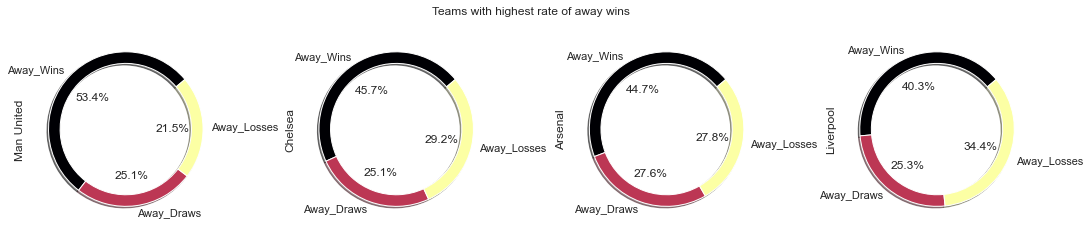

In [131]:
plot_top_teams_AW = away_results.sort_values(by='Away_Wins%', ascending=False)[:4].loc[:,'Away_Wins':'Away_Losses']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of away wins")
for i in list(plot_top_teams_AW.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_AW.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=40, cmap='inferno', ax=ax)

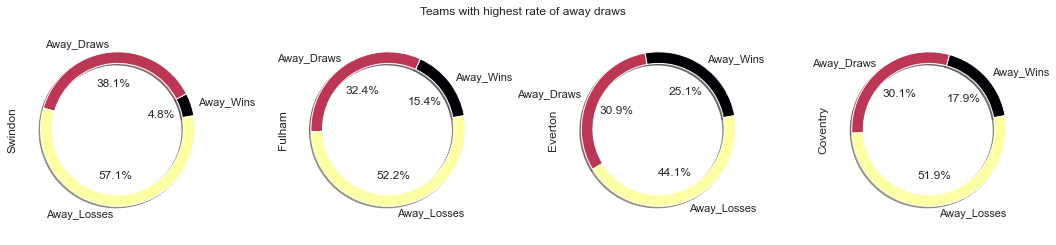

In [132]:
plot_top_teams_AD = away_results.sort_values(by='Away_Draws%', ascending=False)[:4].loc[:,'Away_Wins':'Away_Losses']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of away draws")
for i in list(plot_top_teams_AD.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_AD.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=10, cmap='inferno', ax=ax)

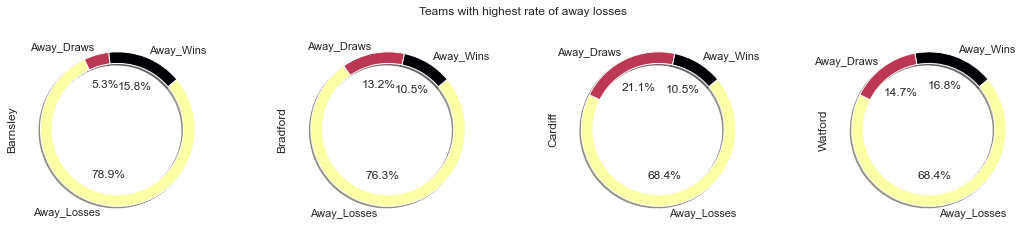

In [133]:
plot_top_teams_AL = away_results.sort_values(by='Away_Losses%', ascending=False)[:4].loc[:,'Away_Wins':'Away_Losses']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of away losses")
for i in list(plot_top_teams_AL.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_AL.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=40, cmap='inferno', ax=ax)

**Observation:**
  * The **teams having the highest home games win rate also have highest away wins rate** (Man United, Chelsea, Arsenal and Liverpool).
  * Teams which have played [less number of seasons](#sectionSeasonsCount)(i.e. Barnsley - 1 season, Bradford - 2 seasons, Cardiff - 1 season) **have higher rates of draw and losses** in away games.

<a id=section50207></a>
#### 5.2.7 Teams ranking based on number of wins-losses-draw rates overall

In [137]:
home_results.reset_index(inplace=True)
away_results.reset_index(inplace=True)
team_results = pd.merge(home_results, away_results, left_on='HomeTeam', right_on='AwayTeam')

In [153]:
team_results['Total_Matches'] = team_results['Home_Matches'] + team_results['Away_Matches']
team_results['Total_Wins'] = team_results['Home_Wins'] + team_results['Away_Wins']
team_results['Total_Losses'] = team_results['Home_Losses'] + team_results['Away_Losses']
team_results['Total_Draws'] = team_results['Home_Draws'] + team_results['Away_Draws']
team_results['Total_Wins%'] = (team_results['Home_Wins'] + team_results['Away_Wins'])/team_results['Total_Matches']
team_results['Total_Losses%'] = (team_results['Home_Losses'] + team_results['Away_Losses'])/team_results['Total_Matches']
team_results['Total_Draws%'] = (team_results['Home_Draws'] + team_results['Away_Draws'])/team_results['Total_Matches']

#team_results.drop(columns='AwayTeam', inplace=True)
team_results.rename(columns={'HomeTeam' : 'TeamName'}, inplace=True)
team_results.set_index('TeamName', inplace=True)

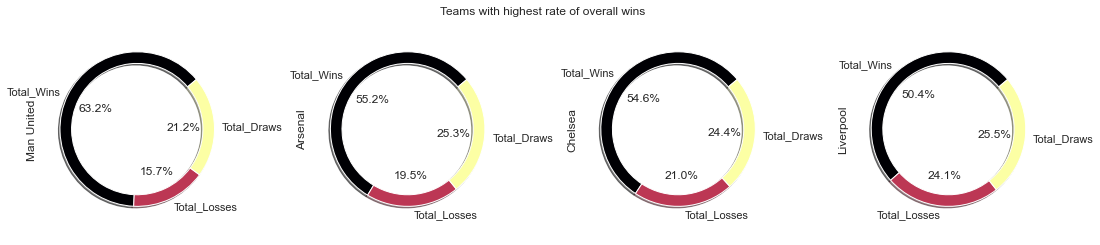

In [154]:
plot_top_teams_TW = team_results.sort_values(by='Total_Wins%', ascending=False)[:4].loc[:,'Total_Wins':'Total_Draws']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of overall wins")
for i in list(plot_top_teams_TW.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_TW.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=40, cmap='inferno', ax=ax)

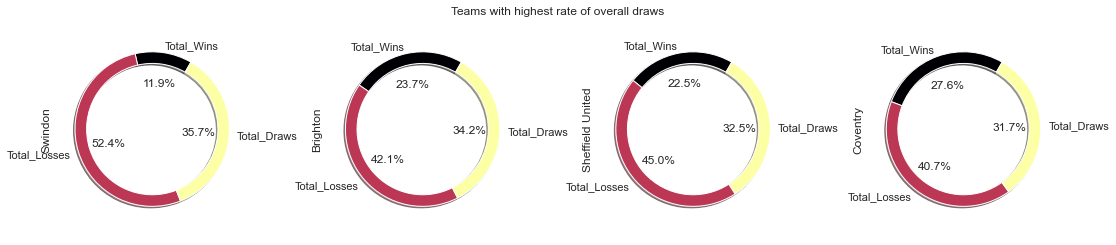

In [157]:
plot_top_teams_TD = team_results.sort_values(by='Total_Draws%', ascending=False)[:4].loc[:,'Total_Wins':'Total_Draws']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of overall draws")
for i in list(plot_top_teams_TD.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_TD.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=60, cmap='inferno', ax=ax)

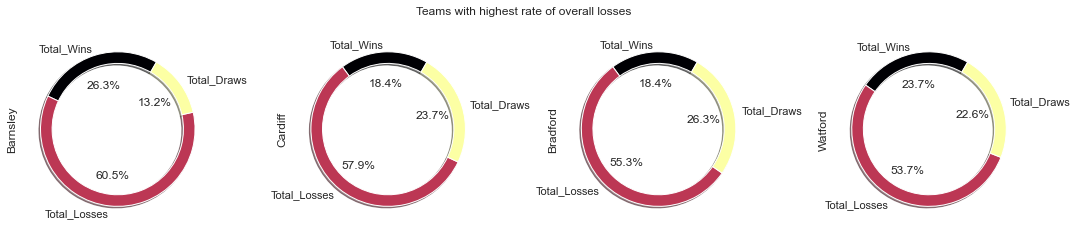

In [158]:
plot_top_teams_TL = team_results.sort_values(by='Total_Losses%', ascending=False)[:4].loc[:,'Total_Wins':'Total_Draws']

fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(hspace=1, wspace=0.4)
counter = 1
plt.axis('off')
plt.title("Teams with highest rate of overall losses")
for i in list(plot_top_teams_TL.index):
    ax = fig.add_subplot(1, 4, counter)
    counter += 1
    plot_top_teams_TL.loc[i].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=60, cmap='inferno', ax=ax)

**Observations:**
  * Few teams - **Man United, Arsenal, Chelsea and Liverpool have dominated English Premier League, scoring most number of goals and winning most number of games**
  * **Team newly promoted to the league, have lost most number of home and away games, and conceded most number of goals**.

<a id=section50208></a>
#### 5.2.8 Teams performance analysis per season

In [47]:
HT_season_wise_perf = epl_dataset.groupby(by=['Season', 'HomeTeam'])['FTR'].value_counts().unstack()
HT_season_wise_perf.reset_index(inplace=True)
HT_season_wise_perf.rename(columns={'HomeTeam' : 'TeamName', 'A' : 'Home_Losses', 'D' : 'Home_Draws', 'H' : 'Home_Wins'}, inplace=True)
HT_season_wise_perf.fillna(0, inplace=True)

AT_season_wise_perf = epl_dataset.groupby(by=['Season', 'AwayTeam'])['FTR'].value_counts().unstack()
AT_season_wise_perf.reset_index(inplace=True)
AT_season_wise_perf.rename(columns={'AwayTeam' : 'TeamName', 'H' : 'Away_Losses', 'D' : 'Away_Draws', 'A' : 'Away_Wins'}, inplace=True)
AT_season_wise_perf.fillna(0, inplace=True)

In [48]:
Teams_season_wise_perf = pd.merge(HT_season_wise_perf, AT_season_wise_perf, on=['Season','TeamName'])
Teams_season_wise_perf['Season_Wins'] = Teams_season_wise_perf['Home_Wins'] + Teams_season_wise_perf['Away_Wins']
Teams_season_wise_perf['Season_Losses'] = Teams_season_wise_perf['Home_Losses'] + Teams_season_wise_perf['Away_Losses']
Teams_season_wise_perf['Season_Draws'] = Teams_season_wise_perf['Home_Draws'] + Teams_season_wise_perf['Away_Draws']

**Calculating the points scored by each team as per below:**
  * 3 points per win
  * 1 point per draw
  * 0 point per loss

In [49]:
Teams_season_wise_perf['Season_Points'] = ((Teams_season_wise_perf['Season_Wins'] * 3) + (Teams_season_wise_perf['Season_Draws']))
Teams_season_wise_perf.loc[Teams_season_wise_perf['Season_Points'].isnull() == True, 'Season_Points'] = 0.0
Teams_season_wise_perf['Season_Points'] = Teams_season_wise_perf['Season_Points'].astype('int')

**Creating points table for each season with each team ranked 1st to last based on the points scored**

In [50]:
dict_season_tables = {}
for season in list(Teams_season_wise_perf['Season'].unique()):
    df_name = 'Season_' + str(season) + '_Table'
    dict_season_tables[df_name] = Teams_season_wise_perf[Teams_season_wise_perf['Season'] == season]
    temp_season_table = dict_season_tables[df_name]
    temp_season_table.sort_values(by='Season_Points', ascending=False, inplace=True)

In [51]:
winners_list = []
for season in dict_season_tables:
     winners_list.append(dict_season_tables[season].iloc[0]['TeamName'])  

winners_series = pd.Series(winners_list)

<a id=sectionTeamLeagueWin></a>
#### Teams which have won the league

Text(0, 0.5, 'Number of league wins')

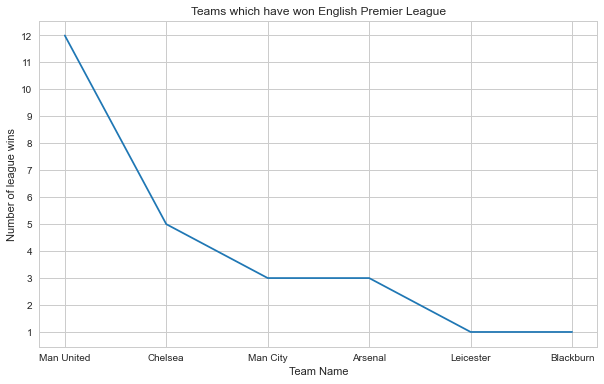

In [52]:
plt.figure(figsize=(10,6))
ytick = np.arange(0, 13)
plt.yticks(ticks=ytick)
winners_series.value_counts().plot()
plt.title('Teams which have won English Premier League')
plt.xlabel('Team Name')
plt.ylabel('Number of league wins')


<a id=sectionTeamLeagueTop6></a>
#### Teams which have finished top 6 in league

Top 6 finish is a great importance in English Premier Leagues as: 
  * Top 4 teams can participate in UEFA Champions League.
  * 5th and 6th placed team can compete in UEFA Europa League.

In [53]:
Top6_list = []
for season in dict_season_tables:
     Top6_list[len(Top6_list):] = list(dict_season_tables[season].iloc[0:6]['TeamName'])  

Top6_list = pd.Series(Top6_list)

Text(0, 0.5, 'Number of top 6 finishes')

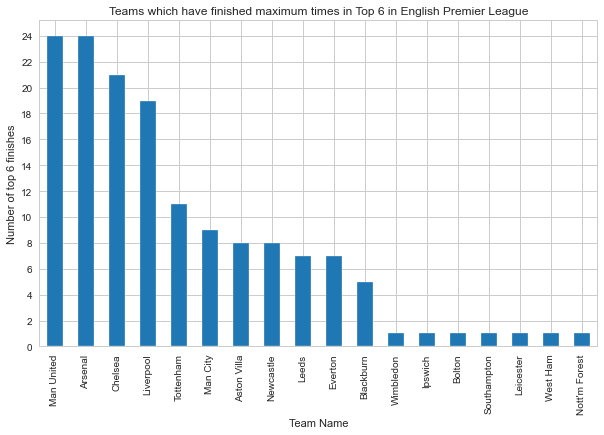

In [54]:
plt.figure(figsize=(10,6))
Top6_list.value_counts().plot.bar()
plt.yticks(ticks=np.arange(0,25,2))
plt.title('Teams which have finished maximum times in Top 6 in English Premier League')
plt.xlabel('Team Name')
plt.ylabel('Number of top 6 finishes')

<a id=sectionTeamBottomFinish></a>
#### Teams which have finished at bottom in league

In [55]:
Bottom3_list = []
for season in dict_season_tables:
     Bottom3_list[len(Bottom3_list):] = list(dict_season_tables[season].iloc[-3:]['TeamName'])  

Bottom3_list = pd.Series(Bottom3_list)
len(Bottom3_list.unique())

41

Text(0, 0.5, 'Number of bottom 3 finishes')

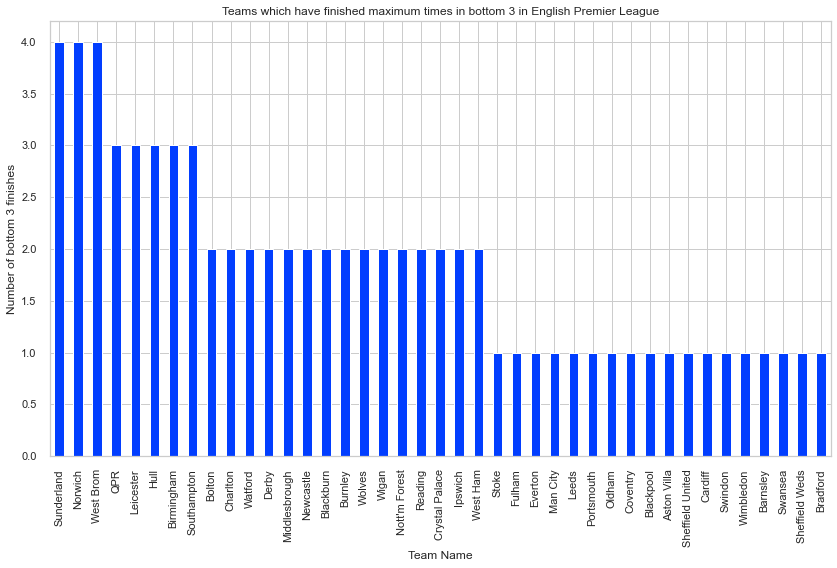

In [287]:
plt.figure(figsize=(14,8))
Bottom3_list.value_counts().plot.bar()
plt.title('Teams which have finished maximum times in bottom 3 in English Premier League')
plt.xlabel('Team Name')
plt.ylabel('Number of bottom 3 finishes')

**Observations:**
  * The English Premier League has been **won by only 6 teams over 25 seasons.**
  * **Man United has won the bulk of seasons with 12 times first finish.**
  * **It is followed by Chelsea which has won 5 times.**
  * The **top 6 finishes has also been shared by 18 teams** out of total 49 teams which have participated across 25 seasons.
  * **Arsenal and Man United have finished 24 seasons in top 6 position** missing out only in 1 season.

  * However, staggeringly **41 teams have had bottom 3 finishes.** Most of these times have participated in league for 1 or 2 seasons only.

<a id=section50209></a>
#### 5.2.9 Scores of Top 6 consistent teams across all seasons 

Man United, Arsenal, Chelsea, Man City, Tottenham and Liverpool teams have consistently performed well and have most number of Top 6 finishes.
Let us examine how these teams have performed over the seasons.

In [56]:
Teams_season_wise_perf_copy = Teams_season_wise_perf.copy()
Top6_team_scores_all_seasons = Teams_season_wise_perf[Teams_season_wise_perf['TeamName'] == 'Man United']
for team in ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Tottenham']:
    Top6_team_scores_all_seasons = pd.concat([Top6_team_scores_all_seasons, Teams_season_wise_perf[Teams_season_wise_perf['TeamName'] == team]], ignore_index=True)

Text(0, 0.5, 'Number of points earned')

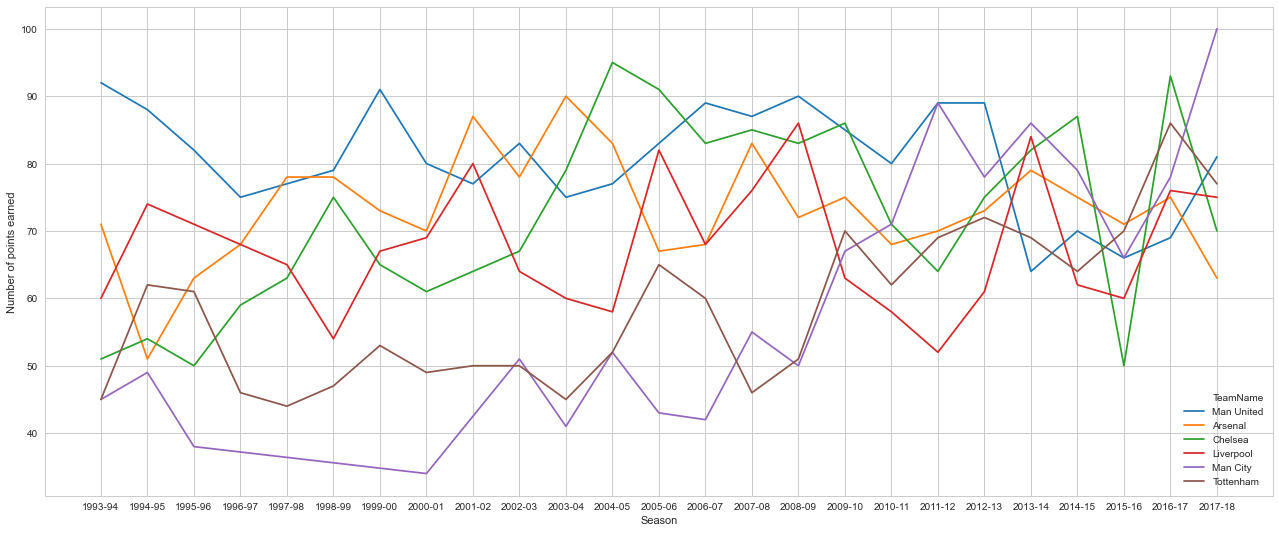

In [57]:
fig, ax = plt.subplots(figsize=(22,9))
sns.lineplot(x="Season", y="Season_Points", hue="TeamName", data=Top6_team_scores_all_seasons, ax=ax)
plt.ylabel("Number of points earned")

**Observations:**
  * **Man United and Arsenal have been the most consistently performing teams** across all seasons.
  * However, **both Man United and Arsenal, have scored less point from season 2014-15 onwards.**
  * **Liverpool has been quite inconsistent across seasons** and has dropped points heavily in some seasons.**
  * **Chelsea has seen a huge growth in points since 2002-03 season** and has consistently performed in later seasons. The boost in performance is due to it being acquired by Russian billionaire. It has won 5 league titles since then.
  * **Tottenham and Man City started poorly in initial seasons, but have performed consistently well 2011-12 seasons.**
  * Man City being acquired by Saudi Arabia conglomerate got enough funds to improve its team and has won 3 premier league titles since 2011-12 season.
  * **All teams have dropped points in season 2015-16**, which gave opportunity for Leicester to secure its maiden title.

<a id=section503></a>
### 5.3 Analysis based on full time and half time goals

<a id=section50301></a>
#### 5.3.1 Most common scoreline

In [58]:
epl_dataset_copy = epl_dataset.copy()
epl_dataset_copy['String_scoreline_FT'] = epl_dataset['FTHG'].astype('str') + '-' + epl_dataset['FTAG'].astype('str')
epl_dataset_copy['String_scoreline_HT'] = epl_dataset['HTHG'].astype('str') + '-' + epl_dataset['HTAG'].astype('str')

**Removing half time scores of seasons 1993-94, 1994-95 due to [bias](#section403Note)**

In [59]:
filtered_scoreline_df = epl_dataset_copy[(epl_dataset_copy['Season'] != '1993-94') & (epl_dataset_copy['Season'] != '1994-95')]

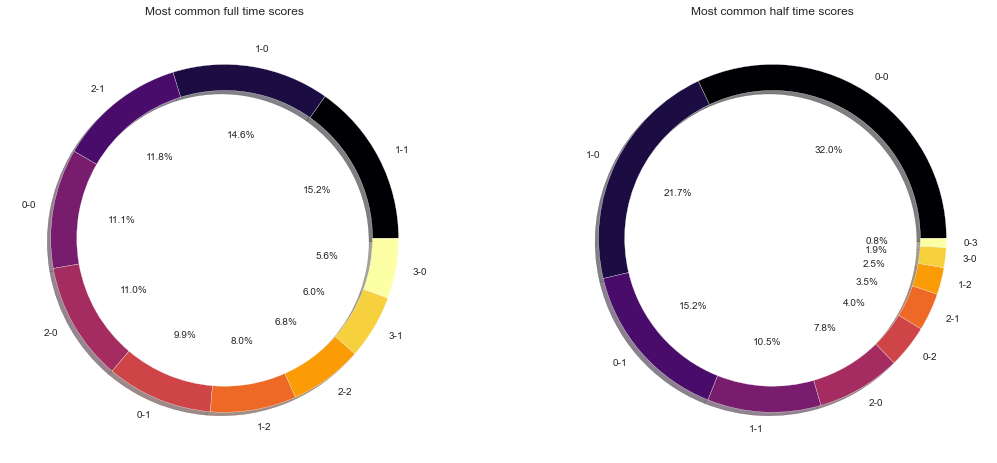

In [60]:
f,ax = plt.subplots(1, 2)
filtered_scoreline_df['String_scoreline_FT'].value_counts()[:10].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, cmap='inferno', ax=ax[0])
filtered_scoreline_df['String_scoreline_HT'].value_counts()[:10].plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, cmap='inferno', ax=ax[1])
ax[0].set_title('Most common full time scores')
ax[0].set_ylabel('')
ax[1].set_title('Most common half time scores')
ax[1].set_ylabel('')
f.set_figheight(8)
f.set_figwidth(18)

<a id=sectionHTFTCG></a>
**Observation:**
  * **0-0 draw is most likely outcome in half time.**
  * **1-1 draw is most likely outcome in full time.**
  * **0-0 scoreline accounts to 32% of half time scores**, whereas it accounts to only **11.1% of full time scoreline.** This indicates that **teams are more likely to score atleast 1 goal in second half.**
  
To check the probability of scoring in each half, let us visualize density plot
  

In [312]:
filtered_scoreline_df['Full_time_Goals'] = filtered_scoreline_df['FTHG'] + filtered_scoreline_df['FTAG']
filtered_scoreline_df['Half_time_Goals'] = filtered_scoreline_df['HTHG'] + filtered_scoreline_df['HTAG']

Text(0.5, 1.0, 'Number of goals scored in full time by both teams')

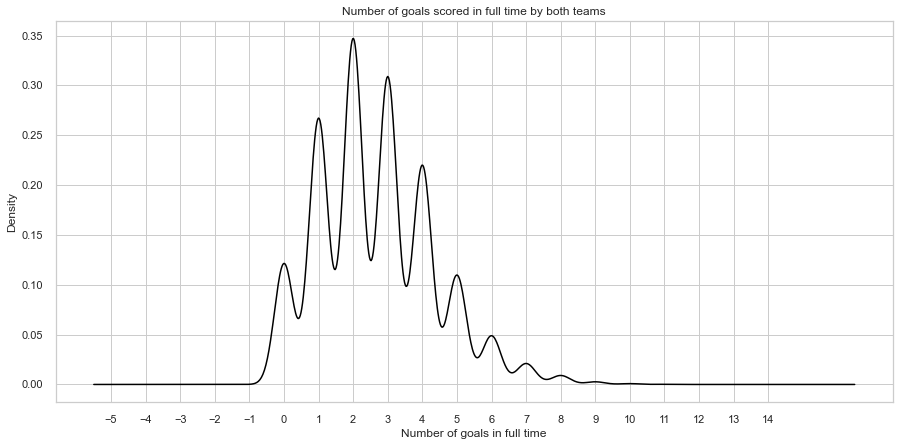

In [315]:
filtered_scoreline_df['Full_time_Goals'].plot(kind='kde', figsize=(15, 7), color='black')
plt.xticks(ticks=np.arange(-5,15))
plt.xlabel('Number of goals in full time')
plt.ylabel('Density')
plt.title('Number of goals scored in full time by both teams')

Text(0.5, 1.0, 'Number of goals scored in half time by both teams')

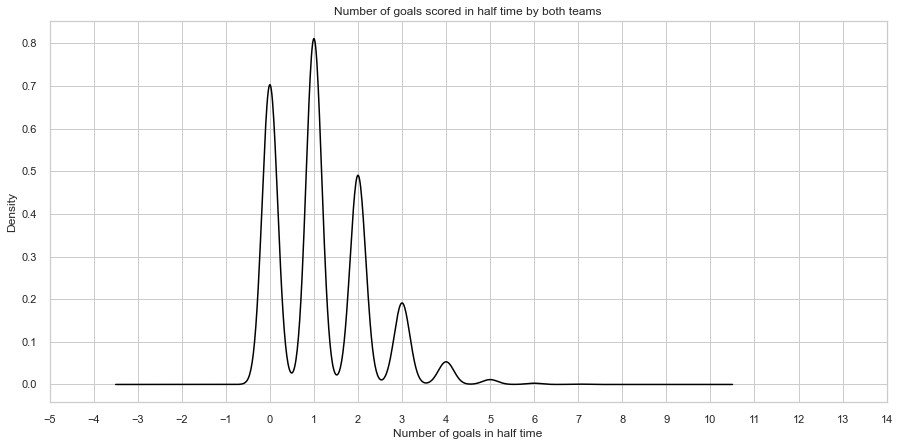

In [316]:
filtered_scoreline_df['Half_time_Goals'].plot(kind='kde', figsize=(15, 7), color='black')
plt.xticks(ticks=np.arange(-5,15))
plt.xlabel('Number of goals in half time')
plt.ylabel('Density')
plt.title('Number of goals scored in half time by both teams')

<a id=sectionHTFTGA></a>
**Observation:**
  * As can be seen from above graphs, **probability density of no goals in first half is as high as 0.7**.
  * However, the **probability of zero goals in second half is 0.1**.
  * **At half time, teams are more likely to score only 1 goal**, probability density is 0.8.
  * **At full time, total goals scored in a match is more likely to be 2 goals**.
  
Thus, it can be concluded that teams are more likely to score goals in second half.

<a id=section50302></a>
#### 5.3.2 Teams which have successfully retained Half time lead at home games

In [61]:
home_games_retained_lead = filtered_scoreline_df[((filtered_scoreline_df['FTR'] == 'H') & (filtered_scoreline_df['HTR'] == 'H'))].groupby('HomeTeam').size()
home_games_having_lead = filtered_scoreline_df[(filtered_scoreline_df['HTR'] == 'H')].groupby('HomeTeam').size()

home_games_retained_lead = home_games_retained_lead.reset_index()
home_games_retained_lead.rename(columns={'HomeTeam' : 'TeamName', 0 : 'Won'}, inplace=True)

home_games_having_lead = home_games_having_lead.reset_index()
home_games_having_lead.rename(columns={'HomeTeam' : 'TeamName', 0 : 'Lead'}, inplace=True)

home_games_lead_retained = pd.merge(home_games_retained_lead, home_games_having_lead, on='TeamName')
home_games_lead_retained['Lead_Retained%'] = home_games_lead_retained['Won']/home_games_having_lead['Lead']

top_HG_lead_retained = home_games_lead_retained.sort_values(by='Lead_Retained%', ascending=False)[:15]
top_HG_lead_retained.set_index('TeamName', inplace=True)

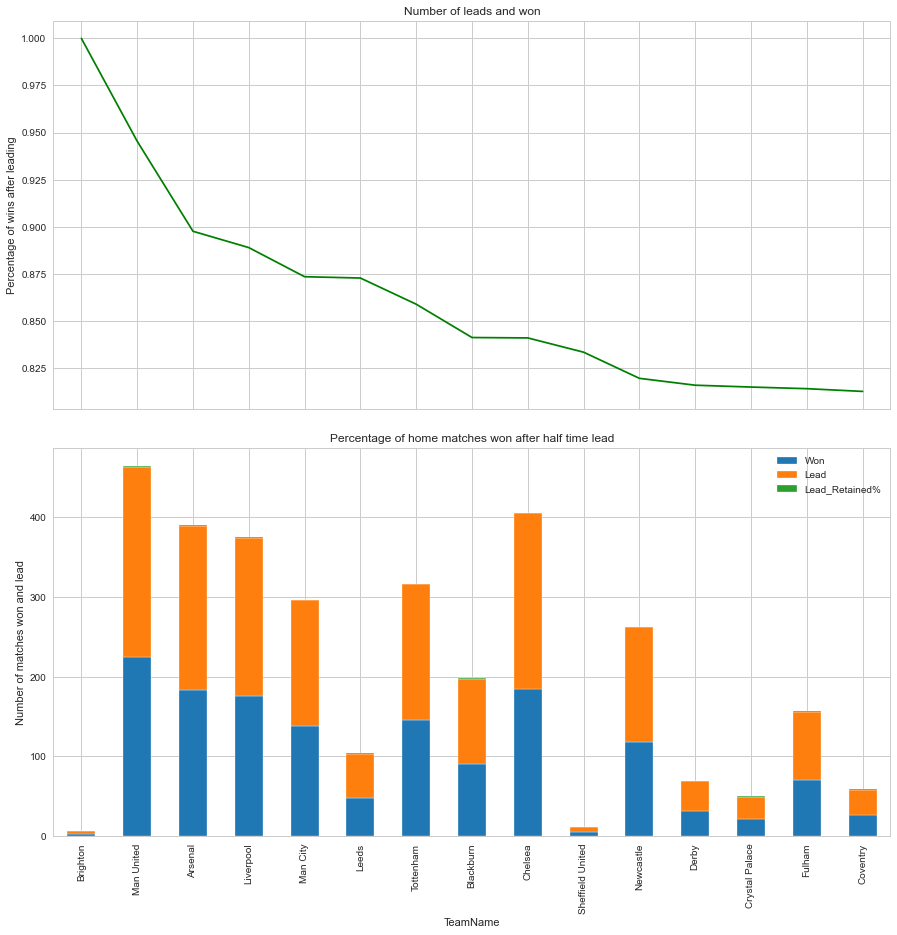

In [62]:
f,ax = plt.subplots(2, 1, sharex='col')
top_HG_lead_retained['Lead_Retained%'].plot(ax=ax[0], color='green')
top_HG_lead_retained.plot.bar(stacked=True, ax=ax[1])
ax[0].set_title('Number of leads and won')
ax[0].set_ylabel('Percentage of wins after leading')
ax[1].set_title('Percentage of home matches won after half time lead')
ax[1].set_ylabel('Number of matches won and lead')
f.set_figheight(15)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.1, wspace=0.4)

<a id=sectionTRHTL></a>
**Observations:**
  * All the **highest scoring teams**(Man United, Arsenal, Man City, Liverpool, Tottenham and Chelsea)  **have high lead to win conversion.** If they lead during half time, their chances of winning is more varying from 85% to 95%.
  * **Man United again fares better than all other teams, having almost 95% home lead to win conversion.**
  * Surprisingly, **some of the low scoring teams** (Brighton, Blackburn, Coventry) **also have high lead to win conversion.** However, unlike the high scoring teams, these teams do not lead in half time as frequently as high scoring teams.

<a id=section50303></a>
#### 5.3.3 Teams which have successfully retained Half time lead at away games

In [63]:
away_games_retained_lead = filtered_scoreline_df[((filtered_scoreline_df['FTR'] == 'A') & (filtered_scoreline_df['HTR'] == 'A'))].groupby('AwayTeam').size()
away_games_having_lead = filtered_scoreline_df[(filtered_scoreline_df['HTR'] == 'A')].groupby('AwayTeam').size()

away_games_retained_lead = away_games_retained_lead.reset_index()
away_games_retained_lead.rename(columns={'AwayTeam' : 'TeamName', 0 : 'Won'}, inplace=True)

away_games_having_lead = away_games_having_lead.reset_index()
away_games_having_lead.rename(columns={'AwayTeam' : 'TeamName', 0 : 'Lead'}, inplace=True)

away_games_lead_retained = pd.merge(away_games_retained_lead, away_games_having_lead, on='TeamName')
away_games_lead_retained['Lead_Retained%'] = away_games_lead_retained['Won']/away_games_having_lead['Lead']

top_AG_lead_retained = away_games_lead_retained.sort_values(by='Lead_Retained%', ascending=False)[0:15]
top_AG_lead_retained.set_index('TeamName', inplace=True)

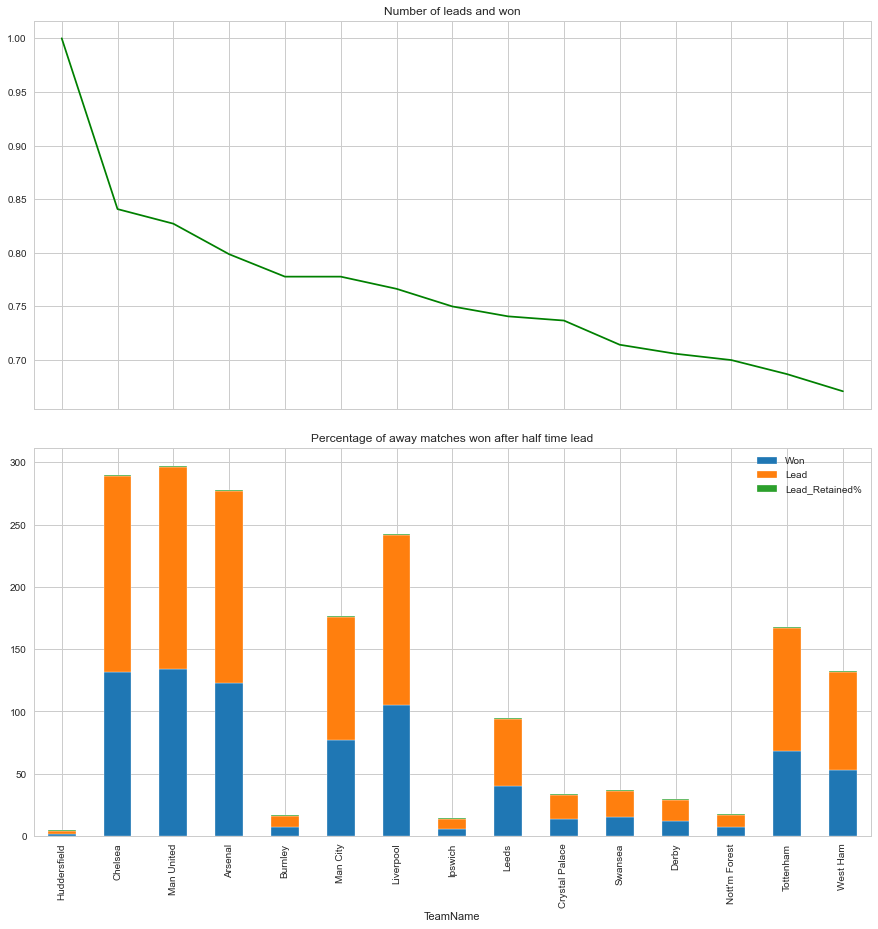

In [64]:
f,ax = plt.subplots(2, 1, sharex='col')
top_AG_lead_retained['Lead_Retained%'].plot(ax=ax[0], color='green')
top_AG_lead_retained.plot.bar(stacked=True, ax=ax[1])
ax[0].set_title('Number of leads and won')
ax[1].set_title('Percentage of away matches won after half time lead')
f.set_figheight(15)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.1, wspace=0.4)

**Observations:**
  * Again, **top scoring teams having high away lead to win conversion.**
  * **Chelsea has slightly better away lead to win conversion (~85%) than consistently performing Man United (82.5%).**
  * **Tottenham has the least away lead to win conversion (<70%)** among the top scoring teams.
  * Some of the average performing teams such as Swansea, Leeds fare better than Tottenham.

<a id=section50304></a>
#### 5.3.4 Teams which have lost or drawn home matches after leading in Half time

In [65]:
home_games_lost_lead = filtered_scoreline_df[((filtered_scoreline_df['FTR'] == 'A') & (filtered_scoreline_df['HTR'] == 'H'))].groupby('HomeTeam').size()
home_games_having_lead = filtered_scoreline_df[(filtered_scoreline_df['HTR'] == 'H')].groupby('HomeTeam').size()

home_games_lost_lead = home_games_lost_lead.reset_index()
home_games_lost_lead.rename(columns={'HomeTeam' : 'TeamName', 0 : 'Lost'}, inplace=True)

home_games_having_lead = home_games_having_lead.reset_index()
home_games_having_lead.rename(columns={'HomeTeam' : 'TeamName', 0 : 'Lead'}, inplace=True)

home_games_lead_lost = pd.merge(home_games_lost_lead, home_games_having_lead, on='TeamName')
home_games_lead_lost['Lead_Lost%'] = home_games_lead_lost['Lost']/home_games_having_lead['Lead'].astype('float64')

top_HG_lead_lost = home_games_lead_lost.sort_values(by='Lead_Lost%', ascending=False)[2:15]
top_HG_lead_lost.set_index('TeamName', inplace=True)

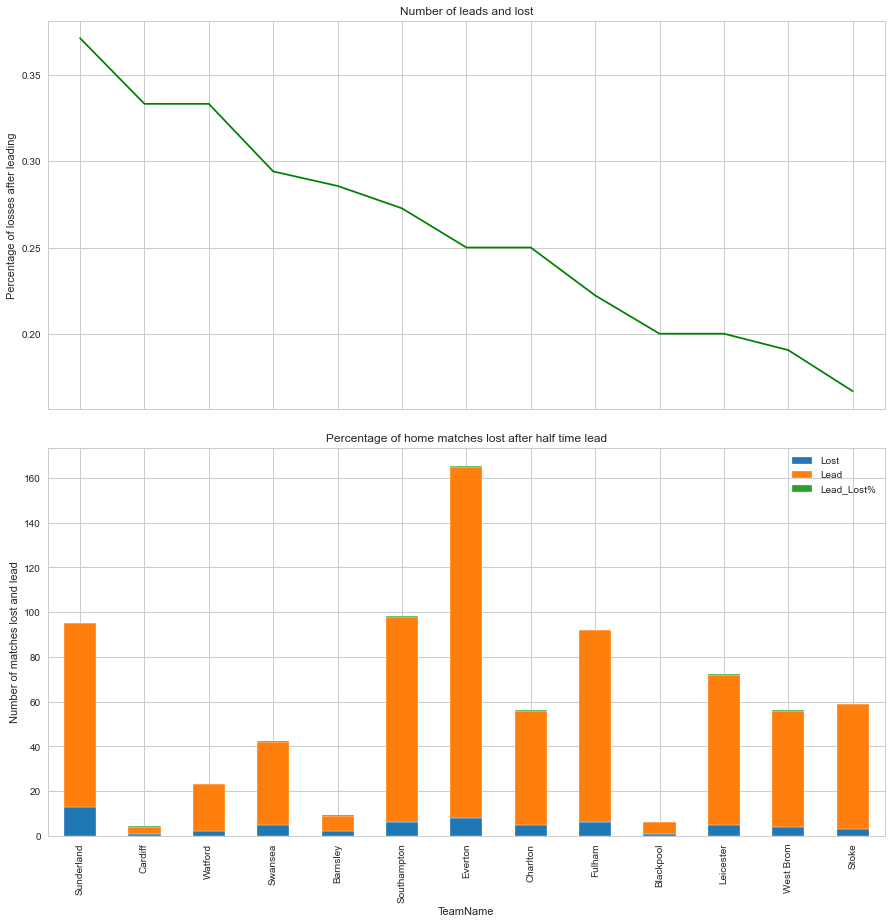

In [66]:
f,ax = plt.subplots(2, 1, sharex='col')
top_HG_lead_lost['Lead_Lost%'].plot(ax=ax[0], color='green')
top_HG_lead_lost.plot.bar(stacked=True, ax=ax[1])
ax[0].set_title('Number of leads and lost')
ax[0].set_ylabel('Percentage of losses after leading')
ax[1].set_title('Percentage of home matches lost after half time lead')
ax[1].set_ylabel('Number of matches lost and lead')
f.set_figheight(15)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.1, wspace=0.4)

**Observations:**
  * **None of top scoring teams have high home game loss rate when leading in half time.**
  * **Also, there are few low scoring team which loose after leading in half time.** (Cardiff, Blackpool, Barnsley)
  * **Everton which has featured in all 25 seasons has loss probability of 25% after leading in half time.**

<a id=section50305></a>
#### 5.3.5 Teams which have lost most of the away matches after leading in Half time

In [438]:
away_games_lost_lead = filtered_scoreline_df[((filtered_scoreline_df['FTR'] == 'H') & (filtered_scoreline_df['HTR'] == 'A'))].groupby('AwayTeam').size()
away_games_having_lead = filtered_scoreline_df[(filtered_scoreline_df['HTR'] == 'A')].groupby('AwayTeam').size()

away_games_lost_lead = away_games_lost_lead.reset_index()
away_games_lost_lead.rename(columns={'AwayTeam' : 'TeamName', 0 : 'Lost'}, inplace=True)

away_games_having_lead = away_games_having_lead.reset_index()
away_games_having_lead.rename(columns={'AwayTeam' : 'TeamName', 0 : 'Lead'}, inplace=True)

away_games_lead_lost = pd.merge(away_games_lost_lead, away_games_having_lead, on='TeamName')
away_games_lead_lost['Lead_Lost%'] = away_games_lead_lost['Lost']/away_games_having_lead['Lead']

top_AG_lead_lost = away_games_lead_lost.sort_values(by='Lead_Lost%', ascending=False)[10:15]
top_AG_lead_lost.set_index('TeamName', inplace=True)

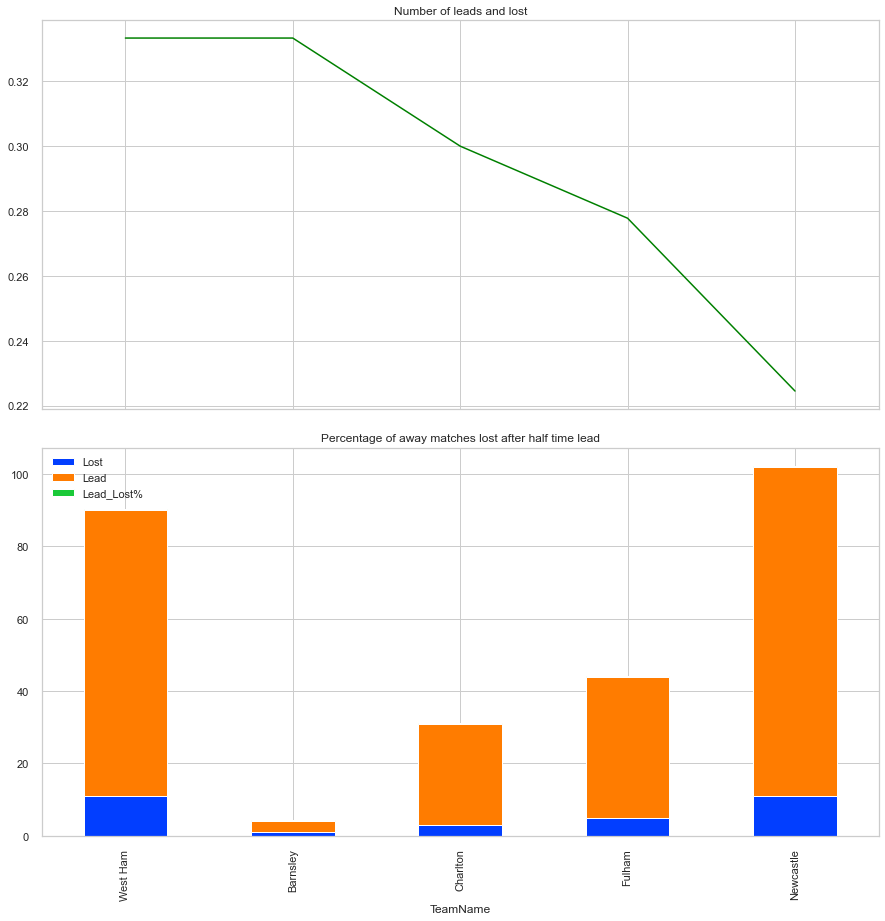

In [440]:
f,ax = plt.subplots(2, 1, sharex='col')
top_AG_lead_lost['Lead_Lost%'].plot(ax=ax[0], color='green')
top_AG_lead_lost.plot.bar(stacked=True, ax=ax[1])
ax[0].set_title('Number of leads and lost')
ax[1].set_title('Percentage of away matches lost after half time lead')
f.set_figheight(15)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.1, wspace=0.4)

<a id=section6></a>
## 6. Conclusion
___

Analysis was done on English Premier League data to gain insights on teams, different seasons, goals and trends across season timeline (i.e. August to May).

*Timeline*
  * As April and December are festive seasons in Europe, more matches are scheduled in these [months](#section50101obs) to encourage more attendance. Hence, more revenue gained.
  * Due to higher number of matches, players feel exhausation. Hence, past [3 seasons have recorded lowest number of goals in these months](#sectionGPSM). Goal scoring rate is better in other months.
  * High goals per game is registered in months of [January and February](#sectionGPSM) in past 3 seasons as manager are more actively involved in January transfer window and have replenished their exhausted team.
  
*Teams*
  * 49 teams have participated in EPL across 25 seasons.
  * [22 teams](#sectionTeamMatchNum) participated in the first 2 seasons of premier league. 
  * This lead to [high number of matches](#sectionTeamMatchNum), and hence high number of goals scored in [particular months](#sectionGPSM2), which can be seen as outliers.
  * Due to high frequency of fixtures, the number of teams competing in league were reduced to 20. This accounted to over 80 games being played less.
  * Only [6 teams](#sectionTeamLeagueWin) have won the league.
  * 6 teams- Man United, Chelsea, Arsenal, Liverpool, Tottenham and Man City have consistenly played well in the recent past.[1](#section50209)
  * These teams have high scoring rate per game and low conceding rates.[2](#sectionHighGoalsRate)
  * Man United has dominated the league with 12 league titles.
  * In recent seasons, it has lost dominance to Man City.
  * Many teams have struggled to play consistently in the league. [41 teams](#sectionTeamBottomFinish) have finished bottom 3 in the league and have been relegated.
  * Also, there are [7 teams](#sectionSeasonsCount) which have played only 1 season. Further 2 teams have played only 2 seasons.
  * These, teams have conceded most number of goals per game and have low scoring rate.[3](#sectionTConcededMost)
  * Key to survival in league is score more and concede less goals.
  * Draw in most games does not ensure survival.
  * Challenging for title is improbable for new teams.
  
*Half Time and Full Time*
  * Almost [1/3rd of matches](#sectionHTFTCG) in half time end up in 0-0 draw.
  * Whereas, only 11% of matches end in a goaless draw.
  * Thus, [more goals are scored in the second half](#sectionHTFTGA) of the game.
  * Consistently performing [top 6 teams, have high chances of winning](#sectionTRHTL) both home and away games if they are leading in half time. 

<a id=section601></a>
### 6.1 Actionable Insights

  * In past 3 seasons, the goals in month of April and December are less due to tightly scheduled matches. This has resulted in teams performing below par. Matches schedule in April and December can be spread out more. A relaxed schedule brings out best in teams as it is visible in month of May, where few number of games are conducted, but it has produces highest number of goals per game.
  * The league is dominated by top 6 teams. Teams newly promoted to the Division 1 of EPL, have struggled to cope with it. They have conceded most number of goals per match and scored lesser goals. As much of the revenue generated by EPL is distributed to the top 6 teams, other teams do not have opportunity to compete at their level. They cannot challenge them for the title. 
  
**Relaxed schedule and more even distribution revenue among teams can help bring out best in all teams**. Upholding the spirit of the game, every team should be given opportunity to compete for the title. This will lead to much more **enjoyable game for the fans**.